# **Deep Learning**

1. Training Neural Networks
2. Convolution Neural Network
3. CNN - Case Study
4. Recurrent Neural Networks
5. Attention Models
6. Generative Adversarial Network
7. Self-Supervised Learning

# **1. Training Neural Networks**

## 1.1 Activation Functions

### **1) Sigmoid activation**

![sigmoid.PNG](_image/sigmoid.PNG)  

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

앞서 배웠듯이 0 ~ 1 사이 값을 가지는 함수입니다. 그러나 Neural Networks에서 사용하기엔 많은 문제점이 있습니다.

- 기울기 소실
- output의 중간값이 0이 아니다.
- exp()의 연산이 너무 무겁다.
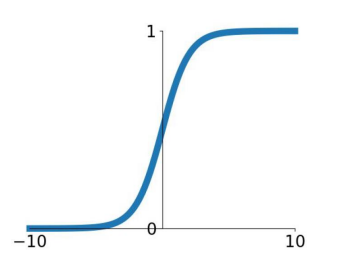

### **2) Softmax activation**

$$P_i = \frac{e^{z_i}}{\sum_{j = 1}^k e^{z_j}}$$

sigmoid가 두 개의 값으로 분류한다면 softmax는 여러 가지 값으로 분류한다. 

### **3) tanh activation**

![tanh](_image/tanh.PNG)

$$tanh(x) = 2 \times sigmoid(x) - 1$$

-1 ~ 1의 범위를 갖고 있습니다. sigmoid의 문제점 중 하나인 output의 중간값을 0으로 만들었습니다. 그러나 기울기 소실 문제는 여전히 남아있습니다.

### **4) ReLU(Rectified Linear Unit)**

![ReLU](_image/ReLU.PNG)

$$computes \; f(x) = max(0, x)$$

학습이 굉장히 빠르고 기울기 소실 문제가 사라집니다. output의 중간값이 0은 아니지만 많이 사용됩니다.

## 1.2 Batch Normalization

sigmoid나 tanh에서 중요한 것 중 하나는 기울기가 살아있는 범위에 input 데이터가 들어가야 유의미한 값이 나온다는 것입니다. 그걸 위해 사용하는 방법이 **Batch Normalization** 입니다. 이를 통해 기울기 소실 문제를 해결할 수 있습니다. 

$$\hat{x}^{(k)} = \frac{x^{(k)} - \text{E}[x^{(k)}]}{\sqrt{\text{Var}[x^{(k)}]}}$$

위 식을 통해 평균 0, 분산 1의 input data가 만들어집니다. 

그 후, Neural Network가 데이터에 말맞게 평균과 분산을 조절합니다.

$$y^{(k)} = \gamma^{(k)} \hat{x}^{(k)} + \beta^{(k)}$$

이를 통해 $\gamma$는 표준편차를, $\beta$는 평균을 학습시킨다. 이렇게 $\gamma , \beta$의 최적값을 구하는 것이다.

## 1.3 Optimization Methods

optimization을 위한 방법은 여러가지가 있습니다. 왜냐하면 gradient descent를 그대로 사용하면 변동폭이 너무 크게 일어나기 때문입니다. 이제 하나씩 살펴보겠습니다.

여러 방식들이 어떻게 이루어지는지 gif로 보려면 다음 링크로 접속하여 확인하면 됩니다.
http://www.denizyuret.com/2015/03/alec-radfords-animations-for.html

In [4]:
import numpy as np

x = 5 # input data
dx = 2 # gradient
learning_rate = 0.1 # learning rate

### **1) Gradient Descent(SGD)**

![sgd](_image/sgd.PNG)

일반적인 방법은 현재 자신의 위치에서 측정한 경사에 따라 움직입니다. 그렇기에 위 그림처럼 진동이 엄청나게 일어납니다.

In [2]:
# Vanilla gradient descent update
x -= learning_rate * dx

### **2) Momentum**

![momentum](_image/momentum.PNG)

Momentum은 현재 위치에서 측정한 기울기만 사용하지 않습니다. 전에 지나온 기울기들을 계속해서 합산하여 사용합니다. 그렇기 때문에 진동이 큰 방향은 진동 크기를 줄이고 맞는 방향은 더욱 빠르게 가도록 해줍니다. 

기울기를 합산할 때, 예전 기울기의 영향력을 줄이기 위해서 0.8 등의 공비를 계속해서 곱해줍니다. 

<img src = "https://miro.medium.com/max/1000/1*X9SaxFM6_sBOAMY9TaGsKw.png">

이름이 momentum이듯, 관성처럼 local minimum에 머물지 않고 global minimum으로 가도록 만들어줍니다.

이를 코드로 보면 다음과 같습니다.

In [3]:
# Momentum update
mu = 0.8 # 공비
v = 0

v = mu * v - learning_rate * dx
x += v

### **3) Adagrad**

기울기들을 합산할 때, 기울기의 크기가 많이 차이나지 않도록 기울기를 제곱해서 합을 구한다음 루트를 취하여 기울기에 나눠줍니다. 코드를 통해 살펴보겠습니다. 

In [5]:
# Adagrad update
cache = 0

cache += dx**2
x -= learning_rate * dx / (np.sqrt(cache) + 1e-7)

이때 1e-7을 더해주는 이유는 cache가 너무 작아져서 0이 되어 error가 나는 것을 방지하기 위해서입니다.

Adagrad는 방향을 잘 찾아가지만 목표에 도달할수록 나누는 값이 너무 커집니다. 그렇기에 한 번의 가는 거리가 점점 작아지고 속도가 느려지게 됩니다.

그렇기에 Adagrad를 직접 사용하지 않고 이를 활용하는 방법들을 사용합니다.

### **4) RMSProp**

Adagrad에서 decay_rate를추가하여 오래된 기울기들의 영향력을 제거하는 방식을 도입한 것이 RMSProp입니다. 코드로 구현하면 다음과 같습니다.

In [6]:
decay_rate = 0.1

# RMSProp update
cache += decay_rate * cache + (1 - decay_rate) * dx**2
x -= learning_rate * dx / (np.sqrt(cache) + 1e-7)

### **5) Adam**

RMSProp와 Momentum 방식을 합쳐서 사용하는 방법이 Adam입니다. 기본적으로 beta1 = 0.9, beta2 = 0.999, eps = 1e-8을 추천됩니다. 코드로 나타내면 다음과 같습니다.

In [7]:
# Adam upgrade
m, v = 0, 0
beta1, beta2 = 0.9, 0.999

m = beta1 * m + (1 - beta1) * dx
v = beta2 * v + (1 - beta2) * (dx**2)
x -= learning_rate * m / (np.sqrt(v) + 1e-7)

## 1.4 Learning Rate

Learning rate는 gradient descent에서 움직이는 보폭 비율이라고 생각하면 됩니다. 그렇기에 learning rate가 크면 크게크게 학습하고 작으면 차근차근 학습하게 됩니다. learning rate의 크기에 따라 학습 정도를 살펴보면 다음과 같습니다.

![learning_rate](_image/learning_rate.PNG)

하나씩 살펴보면 먼저 작은 값을 가지면 학습속도가 매우 느립니다. 만약 큰 값을 가진다면 학습속도가 빠르지만 어느 순간부터 학습이 진행되지 않습니다. 왜냐하면 현재 위치와 목표점의 거리보다 보폭이 더 크기 때문입니다. 그리고 만약 매우 큰 값을 가진다면 학습이 될 수 있지만 금방 발산해버립니다.

그렇기 때문에 epoch가 진행될수록 learning rate를 줄이는 방법을 사용합니다.


![learning_rate2](_image/learning_rate2.PNG)

위 그림처럼 loss가 줄지 않을 때마다 learning rate를 줄여서 학습을 진행합니다. 

learning rate를 늘리거나 줄일 땐, 0.1, 1, 10, 100,... 등 10배씩 키우거나 줄이는 것이 일반적입니다. 또는 $\sqrt{10} \sim 3$을 이용해 3배씩 키우거나 줄입니다.

## 1.5 Ensemble

![ensemble](_image/ensemble.PNG)


위 그림처럼 여러 가지 모델들의 결과를 합쳐서 하나의 평균값으로 예측하는 것을 Ensemble이라고 합니다. Ensemble은 대체적으로 2 ~ 3% 정도 정답률이 증가합니다.

## 1.6 Regularization

### **1) L1, L2 Regularization**

$$L1 : \sum_k \sum_l \lvert W_{k, l} \rvert \quad (W : \text{weight decay})$$
$$L2 : \sum_k \sum_l (W_{k, l})^2$$
$$Elastic net(\text{L1 + L2}) : \sum_k \sum_l (\beta W_{k, l}^2 + \lvert W_{k, l} \rvert)$$

### **2) Dropout**

한 모델에 여러 뉴런이 있습니다. 이 중 임의로 몇 개의 뉴런을 무시하여 다양한 모델들을 사용하는 결과를 주는, 즉 ensemble 효과를 주는 방법을 Dropout이라고 합니다. 

![dropout](_image/dropout.PNG)

위 그림처럼 임의의 뉴런을 무시하고 진행하는 방식입니다. 위 방식을 여러번 사용하여 ensemble처럼 모든 모델들의 예측값의 평균을 내서 결과를 예측합니다.

주의할 점은 Dropout했던 모델을 테스트할 때는 모든 노드를 사용한다는 것입니다. 그렇기에 output이 학습할 때보다 크게 나오게 됩니다. 이를 방지하기 위해 학습 때 사용한 노드의 비중만큼만 output에서 가져옵니다.

예를 들어 70%의 뉴런만 사용하여 학습을 진행했다면 실제 테스트할 때도 ouput의 70%를 실제 예측값으로 사용하게 됩니다.

이를 코드로 나타내면 다음과 같습니다.

In [8]:
p = 0.5 # probability of keeping a unit active, higher = less dropout


def train_step(X, W, b):
    """X contains the data"""
    
    # forward pass for example 3-layer neural network
    H1 = np.maximum(0, np.dot(W[0], X) + b[0])
    U1 = np.random.rand(*H1.shape) < p # first dropout mask
    H1 *= U1 # drop
    H2 = np.maximum(0, np.dot(W[1], H1) + b[1])
    U2 = np.random.rand(*H2.shape) < p # second dropout mask
    H2 *= U2 # drop
    out = np.dot(W[2], H2) + b[2]
    
    # backward pass: compute gradients...(not shown)
    # perform parameter update...(not shown)

In [9]:
def predict(X, W, b):
    # ensemble forward pass
    H1 = np.maximum(0, np.dot(W[0], X) + b[0]) * p # scale the activations
    H2 = np.maximum(0, np.dot(W[1], H1) + b[1]) * p # scale the activations
    out = np.dot(W[2], H2) + b[2]

### **3) Data Augmentation**

가진 데이터들이 적을 때나 더 많이 필요할 때, 데이터들을 변형, 회전, 늘림 등의 과정을 통해 데이터를 늘리는 것을 말합니다.

## 실습1. PyTorch Tutorial

In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

### **1) Tensor operation**

텐서는 배열이나 행렬과 매우 유사한 자료구조입니다. PyTorch에서는 텐서를 사용하여 모델의 입력과 출력뿐만 아니라 모델의 파라미터를 나타냅니다.

GPU나 다른 연산 가속을 위한 특수한 하드웨어에서 실행할 수 있다는 점을 제외하면, 텐서는 NumPy의 ndarray와 매우 유사합니다.

이제 텐서에 대한 다양한 구현을 알아보겠습니다.

In [11]:
# 데이터로부터 직접 생성하기
data = [[1, 2], [3, 4]]
x = torch.tensor(data)
x

tensor([[1, 2],
        [3, 4]])

In [12]:
# numpy array로부터 생성하기
np_array = np.array(data)
x = torch.from_numpy(np_array)
x

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [13]:
# tensor에서 numpy array로 변환하기
x.numpy()

array([[1, 2],
       [3, 4]])

In [14]:
# 다른 텐서와 같은 모양의 텐서 초기화하기
x_ones = torch.ones_like(x) # x_data의 속성을 유지합니다.
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x, dtype=torch.float) # x_data의 속성을 덮어씁니다.
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]], dtype=torch.int32) 

Random Tensor: 
 tensor([[0.0851, 0.0584],
        [0.3296, 0.2676]]) 



In [15]:
# 주어진 shape로 초기화하기
shape = (3,4)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4402, 0.1129, 0.1370, 0.3384],
        [0.3500, 0.0489, 0.0349, 0.6645],
        [0.6792, 0.5942, 0.9422, 0.8516]]) 

Ones Tensor: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


텐서의 속성은 텐서의 모양, 자료형 및 어느 장치에 저장되는지를 나타냅니다.

In [17]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [20]:
# 현재 노트북은 gpu가 없다

#device = torch.device('cuda')
#tensor = tensor.to(device)
#print(f"Device tensor is stored on: {tensor.device}")

그리고 텐서간의 연산도 가능합니다.

In [21]:
# numpy 식의 인덱싱과 슬라이싱
tensor = torch.ones(3, 4)
tensor[:, 1] = 0
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [22]:
# 텐서 합치기, 행으로 길어지도록
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [24]:
# 텐서 합치기, 열로 이어지도록
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [25]:
# 텐서 곱하기

# 요소별 곱(element-wise product)을 계산합니다
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")

# 다른 문법:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [26]:
# 텐서 간 행렬 곱셈
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# 다른 문법:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


### **2) Autograd**

PyTorch에는 torch.autograd라고 불리는 자동 미분 엔진이 내장되어 있습니다. autograd를 통해 입력 X, 파라미터 W , 그리고 cross-entropy loss를 사용하는 logistic regression model의 gradient를 구하겠습니다.

In [27]:
# 입력 및 파라미터 초기화
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
print(x)
print(y)
print(w)
print(b)

tensor([1., 1., 1., 1., 1.])
tensor([0., 0., 0.])
tensor([[ 0.6696, -1.1055,  0.7509],
        [ 0.2827,  0.7063,  1.1959],
        [ 0.4497,  0.8117,  0.0219],
        [ 0.3535,  0.1437,  1.7595],
        [-0.3871,  0.4001, -1.1086]], requires_grad=True)
tensor([-1.2913,  0.2003,  0.2606], requires_grad=True)


In [28]:
# forward
z = torch.matmul(x,w)+b
z

tensor([0.0770, 1.1566, 2.8803], grad_fn=<AddBackward0>)

PyTorch에서는 node를 크게 2가지 방법의 api를 활용해서 사용합니다.

1. torch.nn
2. torch.nn.functional

torch.nn은 사전에 node를 초기화하고 해당 node에 텐서를 통과시켜 값을 받는 형태지만, torch.nn.functional은 사전에 초기화없이 바로 함수처럼 사용하는 방식입니다.

코딩 스타일에 맞춰서 원하시는 api를 사용하시면 됩니다.

In [29]:
# 비용 함수
loss_fn = torch.nn.BCEWithLogitsLoss()
loss = loss_fn(z, y)
loss

tensor(1.6991, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [30]:
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
loss

tensor(1.6991, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

모델에서 매개변수의 가중치를 최적화하려면 파라미터에 대한 loss function의 도함수(derivative)를 계산해야 합니다. 
이러한 도함수를 계산하기 위해, loss.backward() 를 호출한 다음 w.grad와 b.grad에서 값을 가져옵니다

In [31]:
loss.backward()
print(x.grad)
print(w.grad)
print(b.grad)

None
tensor([[0.1731, 0.2536, 0.3156],
        [0.1731, 0.2536, 0.3156],
        [0.1731, 0.2536, 0.3156],
        [0.1731, 0.2536, 0.3156],
        [0.1731, 0.2536, 0.3156]])
tensor([0.1731, 0.2536, 0.3156])


기본적으로, requires_grad=True인 모든 텐서들은 연산 기록을 추적하고 미분 계산을 지원합니다. 그러나 모델을 학습한 뒤 입력 데이터를 단순히 적용하기만 하는 경우와 같이 forward 연산만 필요한 경우에는, 미분 연산을 위한 값들을 저장해두는 것이 속력 및 메모리의 저하를 가져올 수 있습니다. 연산 코드를 torch.no_grad() 블록으로 둘러싸서 미분 추적을 멈출 수 있습니다:

In [32]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


## 실습2. LR vs MLP

이제 MNIS dataset을 활용하여 logistic regression model과 MLP model을 구현해보고 학습 파이프라인을 익혀보겠습니다.

### **1) Import packages**

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

device = 'cuda' if torch.cuda.is_available is True else 'cpu'
device

'cpu'

### **2) Preprocess Dataset**

In [2]:
# load dataset
mnist = fetch_openml('mnist_784', cache=False)

In [3]:
mnist.data.shape

(70000, 784)

mnist에 존재하는 각각의 사진은 28*28의 픽셀로 구성된 784차원짜리 벡터로 나타나져 있습니다. 각 픽셀은 0~255 사이의 값으로 흰색부터 검은색 사이의 값을 나타냅니다. 

In [4]:
# preprocess dataset
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
X = X.values
y = y.values
print(X.shape)
print(y.shape)

# scale
X /= 255.0
print(X.min(), X.max())

(70000, 784)
(70000,)
0.0 1.0


In [5]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
print(X_train.shape) # 80%
print(y_train.shape)
print(X_val.shape) # 10%
print(y_val.shape)
print(X_test.shape) # 10%
print(y_test.shape)

(56000, 784)
(56000,)
(7000, 784)
(7000,)
(7000, 784)
(7000,)


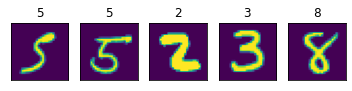

In [6]:
# visualize dataset
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)
        

plot_example(X_train, y_train)

### **3) PyTorch Dataset**

PyTorch에서는 Custom Dataset을 사용하기 위해서는 torch.utils.data.Dataset의 형태로 dataset class를 정의해준 이후, torch.utils.data.DataLoader의 형태로 dataloader class를 정의하여 학습시에 model에 forwarding할 data를 sample해줍니다.

(https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)


가장 보편적으로 사용되는 map-style의 dataset class는 torch.utils.data.Dataset을 superclass로 받아 **getitem()** 과 **len()** 함수를 override해줍니다.

In [7]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        super(CustomDataset, self).__init__()
        self.X = X
        self.y = y
        
    def __getitem__(self, index):
        x = self.X[index]
        y = self.y[index]
        x = torch.from_numpy(x).float()
        y = torch.from_numpy(np.array(y)).long()
        return x, y

    def __len__(self):
        return len(self.X)

In [8]:
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

print(len(train_dataset))
print(train_dataset.X.shape)
print(len(val_dataset))
print(val_dataset.X.shape)
print(len(test_dataset))
print(test_dataset.X.shape)

56000
(56000, 784)
7000
(7000, 784)
7000
(7000, 784)


DataLoader는 train 혹은 validation시 dataset에서 batch를 sampling하기 위한 API입니다 (https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

필수적으로 사용하는 option들은 아래와 같습니다.
- dataset: sampling할 dataset
- batch_size: 한번에 sampling할 dataset의 개수
- shuffle: 1 epoch를 기준으로 dataset을 shuffle할지

더 자세한 option은 api를 참고해주세요.

In [9]:
batch_size = 64

# shuffle the train data
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# do not shuffle the val & test data
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# dataset size // batch_size
print(len(train_dataloader))
print(len(val_dataloader))
print(len(test_dataloader))

875
110
110


### **4) Model**

Pytorch에서 model을 선언할 때는 torch.nn.Module class를 superclass로 받아 __init__()함수와 forward() 함수를 작성해줍니다.

__init__()함수에는 모델의 파라미터들을 선언하고, forward함수에는 해당 파라미터들을 이용하여 data를 model에 통과시켜줍니다.

https://pytorch.org/docs/stable/generated/torch.nn.Module.html

In [10]:
# Initialize Logistic Regression Model
class LR(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LR, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = self.fc(x)
        return x

In [11]:
# Initialize MLP Model
class MLP(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

### **5) Train**

이제 선언한 model을 통해 학습을 진행하기 위해선 파라미터를 최적화할 optimizer가 필요합니다. 이번 실습에선 가장 보편적으로 사용되는 Adam optimizer를 사용하겠습니다.

In [12]:
# Trainer
class Trainer():
    def __init__(self, trainloader, valloader, testloader, model, optimizer, criterion, device):
        """
        trainloader: train data's loader
        testloader: test data's loader
        model: model to train
        optimizer: optimizer to update your model
        criterion: loss function
        """
        self.trainloader = trainloader
        self.valloader = valloader
        self.testloader = testloader
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion
        self.device = device
        
    def train(self, epoch = 1):
        # 학습을 시작하기 위해 model을 train-mode로 변경
        self.model.train()
        for e in range(epoch):
            running_loss = 0.0  
            for i, data in enumerate(self.trainloader, 0): 
                inputs, labels = data 
                # model에 input으로 tensor를 gpu-device로 보낸다
                inputs = inputs.to(self.device)  
                labels = labels.to(self.device)
                # zero the parameter gradients
                # optimizer는 예전 기울기도 계속 저장하기에 기울기를 초기화해준다.
                self.optimizer.zero_grad()    
                # forward + backward + optimize
                # get output after passing through the network
                outputs = self.model(inputs) 
                # compute model's score using the loss function
                loss = self.criterion(outputs, labels)  
                # perform back-propagation from the loss
                loss.backward() 
                # gradient descent를 통해 model의 output을 얻는다.
                self.optimizer.step() 
                running_loss += loss.item()
            
            print('epoch: %d  loss: %.3f' % (e + 1, running_loss / len(self.trainloader)))
            running_loss = 0.0
        val_acc = self.validate()
        return val_acc

    def validate(self):
        # 현재 model이 train-mode일 수 있기에 eval-mode로 바꿔 validate를 수행할 수 있도록 변경
        self.model.eval() 
        correct = 0
        for inputs, labels in self.valloader:
            inputs = inputs.to(self.device)
            labels = labels.to(self.device)
            output = self.model(inputs) 
            pred = output.max(1, keepdim=True)[1] # get the index of the max 
            correct += pred.eq(labels.view_as(pred)).sum().item()
        return correct / len(self.valloader.dataset)
        
    def test(self):
        self.model.eval() 
        correct = 0
        for inputs, labels in self.testloader:
            inputs = inputs.to(self.device)
            labels = labels.to(self.device)
            output = self.model(inputs) 
            pred = output.max(1, keepdim=True)[1] # get the index of the max 
            correct += pred.eq(labels.view_as(pred)).sum().item()
        return correct / len(self.testloader.dataset)


In [64]:
# Logistic Regression
input_dim = 784
output_dim = 10
epoch = 4

best_acc = 0.0
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
for lr in lrs:
    model = LR(input_dim=input_dim, output_dim=output_dim).to(device)
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    trainer = Trainer(train_dataloader, val_dataloader, test_dataloader, model, optimizer, criterion, device)
    val_acc = trainer.train(epoch = epoch)
    print('val_acc: %.3f' %(val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'models/3-1_logistic_model')

trainer.model.load_state_dict(torch.load('models/3-1_logistic_model'))
test_acc = trainer.test()
print('test_acc: %.3f' %(test_acc))

epoch: 1  loss: 1.166
epoch: 2  loss: 1.194
epoch: 3  loss: 1.261
epoch: 4  loss: 1.297
val_acc: 0.886
epoch: 1  loss: 0.356
epoch: 2  loss: 0.305
epoch: 3  loss: 0.296
epoch: 4  loss: 0.294
val_acc: 0.919
epoch: 1  loss: 0.555
epoch: 2  loss: 0.325
epoch: 3  loss: 0.295
epoch: 4  loss: 0.281
val_acc: 0.924
epoch: 1  loss: 1.387
epoch: 2  loss: 0.735
epoch: 3  loss: 0.557
epoch: 4  loss: 0.474
val_acc: 0.893
test_acc: 0.919


In [65]:
# MLP
input_dim = 784
hidden_dim = 32
output_dim = 10
epoch = 4

best_acc = 0.0
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
for lr in lrs:
    model = MLP(input_dim=input_dim, 
                hidden_dim=hidden_dim,
                output_dim=output_dim).to(device)
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    trainer = Trainer(train_dataloader, val_dataloader, test_dataloader, model, optimizer, criterion, device)
    val_acc = trainer.train(epoch = epoch)
    print('val_acc: %.3f' %(val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'models/3-1_MLP_model')

trainer.model.load_state_dict(torch.load('models/3-1_MLP_model'))
test_acc = trainer.test()
print('test_acc: %.3f' %(test_acc))

epoch: 1  loss: 0.930
epoch: 2  loss: 0.956
epoch: 3  loss: 1.004
epoch: 4  loss: 1.003
val_acc: 0.678
epoch: 1  loss: 0.278
epoch: 2  loss: 0.170
epoch: 3  loss: 0.148
epoch: 4  loss: 0.133
val_acc: 0.956
epoch: 1  loss: 0.472
epoch: 2  loss: 0.254
epoch: 3  loss: 0.206
epoch: 4  loss: 0.173
val_acc: 0.950
epoch: 1  loss: 1.298
epoch: 2  loss: 0.553
epoch: 3  loss: 0.414
epoch: 4  loss: 0.358
val_acc: 0.911
test_acc: 0.953


## 실습3. Activation Function

이제 activation function 중 가장 대표적으로 사용되는 sigmoid functio과 ReLU function을 사용해보고 비교해보겠습니다. 데이터는 실습 2에서 사용했던 MNIST를 사용합니다. 모델은 train과 test만 사용하겠습니다.

![](https://drive.google.com/uc?export=view&id=1xfJBd9v9L_RgXGf8urNrYpb40zXU6gea)

- input: 784
- hidden: 32 or (32, 32)
- output: 10
- **activation: sigmoid or relu**
- optimizer: sgd
- loss: cross-entropy

### **0) Prerequisite**

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

device = 'cuda' if torch.cuda.is_available is True else 'cpu'
device

'cpu'

#### **Load Dataset**

In [20]:
mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data.astype('float32').values
y = mnist.target.astype('int64').values
X /= 255.0
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


#### **Split Dataset**

학습과 평가를 위한 dataset으로 나눕니다.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56000, 784)
(56000,)
(14000, 784)
(14000,)


#### **Pytorch Dataset**

In [22]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        super(CustomDataset, self).__init__()
        self.X = X
        self.y = y
        
    def __getitem__(self, index):
        x = self.X[index]
        y = self.y[index]
        x = torch.from_numpy(x).float()
        y = torch.from_numpy(np.array(y)).long()
        return x, y

    def __len__(self):
        return len(self.X)

In [23]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

print(len(train_dataset))
print(train_dataset.X.shape)
print(len(test_dataset))
print(test_dataset.X.shape)

56000
(56000, 784)
14000
(14000, 784)


#### **DataLoader**


In [24]:
batch_size = 64

# shuffle the train data
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# do not shuffle the val & test data
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# dataset size // batch_size
print(len(train_dataloader))
print(len(test_dataloader))

875
219


#### **Trainer**


In [25]:
class Trainer():
    def __init__(self, trainloader, testloader, model, optimizer, criterion, device):
        """
        trainloader: train data's loader
        testloader: test data's loader
        model: model to train
        optimizer: optimizer to update your model
        criterion: loss function
        """
        self.trainloader = trainloader
        self.testloader = testloader
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion
        self.device = device
        
    def train(self, epoch = 1):
        self.model.train()
        for e in range(epoch):
            running_loss = 0.0  
            for i, data in enumerate(self.trainloader, 0): 
                inputs, labels = data 
                # model에 input으로 tensor를 gpu-device로 보낸다
                inputs = inputs.to(self.device)  
                labels = labels.to(self.device)
                # zero the parameter gradients
                self.optimizer.zero_grad()    
                # forward + backward + optimize
                outputs = self.model(inputs) 
                loss = self.criterion(outputs, labels)  
                loss.backward() 
                self.optimizer.step() 
                running_loss += loss.item()
            
            print('epoch: %d  loss: %.3f' % (e + 1, running_loss / len(self.trainloader)))
            running_loss = 0.0
        
    def test(self):
        self.model.eval() 
        correct = 0
        for inputs, labels in self.testloader:
            inputs = inputs.to(self.device)
            labels = labels.to(self.device)
            output = self.model(inputs) 
            pred = output.max(1, keepdim=True)[1] # get the index of the max 
            correct += pred.eq(labels.view_as(pred)).sum().item()
        test_acc = correct / len(self.testloader.dataset)
        print('test_acc: %.3f' %(test_acc))

### **1) 2-layer Network + Sigmoid**

In [29]:
class MLP(nn.Module):
    def __init__(self, 
                input_dim=784, 
                hidden_dim=32, 
                output_dim=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        return x

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)

In [30]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

C:\Users\delphinus\anaconda3\envs\nlp\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch: 1  loss: 2.187
epoch: 2  loss: 1.817
epoch: 3  loss: 1.386
epoch: 4  loss: 1.079
epoch: 5  loss: 0.882
epoch: 6  loss: 0.754
epoch: 7  loss: 0.666
epoch: 8  loss: 0.602
epoch: 9  loss: 0.553
epoch: 10  loss: 0.515


In [31]:
trainer.test()

test_acc: 0.877


### **2) 2-layer Network + ReLU**

In [32]:
class MLP(nn.Module):
    def __init__(self, 
                input_dim=784, 
                hidden_dim=32, 
                output_dim=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)

In [33]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 1.298
epoch: 2  loss: 0.527
epoch: 3  loss: 0.409
epoch: 4  loss: 0.364
epoch: 5  loss: 0.340
epoch: 6  loss: 0.323
epoch: 7  loss: 0.310
epoch: 8  loss: 0.299
epoch: 9  loss: 0.290
epoch: 10  loss: 0.282


In [34]:
trainer.test()

test_acc: 0.917


Activation function에 따른 성능 차이가 보입니다. Sigmoid는 기울기 소실 문제가 발생하지만 그에 비해 ReLU는 기울기 소실 문제가 없기 때문입니다. 이제 층을 늘려보겠습니다.

### **3) 3-layer Network + Sigmoid**

In [35]:
class MLP(nn.Module):
    def __init__(self, 
                input_dim=784, 
                hidden_dim=(32,32), 
                output_dim=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim[0])
        self.fc2 = nn.Linear(hidden_dim[0], hidden_dim[1])
        self.fc3 = nn.Linear(hidden_dim[1], output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        return x

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [36]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 2.303
epoch: 2  loss: 2.295
epoch: 3  loss: 2.288
epoch: 4  loss: 2.278
epoch: 5  loss: 2.259
epoch: 6  loss: 2.221
epoch: 7  loss: 2.147
epoch: 8  loss: 2.027
epoch: 9  loss: 1.887
epoch: 10  loss: 1.741


In [37]:
trainer.test()

test_acc: 0.504


### **4) 3-layer Network + ReLU**

In [38]:
class MLP(nn.Module):
    def __init__(self, 
                input_dim=784, 
                hidden_dim=(32,32), 
                output_dim=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim[0])
        self.fc2 = nn.Linear(hidden_dim[0], hidden_dim[1])
        self.fc3 = nn.Linear(hidden_dim[1], output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [39]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 1.875
epoch: 2  loss: 0.635
epoch: 3  loss: 0.415
epoch: 4  loss: 0.356
epoch: 5  loss: 0.326
epoch: 6  loss: 0.305
epoch: 7  loss: 0.288
epoch: 8  loss: 0.273
epoch: 9  loss: 0.261
epoch: 10  loss: 0.248


In [40]:
trainer.test()

test_acc: 0.928


### **5) 결론**

우선 4가지 경우의 accuracy를 표로 정리하겠습니다.

||Sigmoid|ReLU|
|:---:|:---:|:---:|
|2-layer|0.877|0.917|
|3-layer|0.504|0.928|

ReLU의 경우 어느 정도 비슷해보이지만 Sigmoid의 경우 accuracy가 거의 절반으로 떨어진 것을 볼 수 있습니다. 

Sigmoid의 경우 층이 추가되면서 기울기 소실이 일어난 것으로 보입니다. 그에 반해 ReLU는 기울기 소실이 발생하지 않기에 층이 쌓여도 정확도가 떨어지지는 않습니다. 

만약 activation function이 없다면 가중치와 입력값의 곱으로만 뉴런이 이루어집니다. 이는 non-linear한 데이터를 표현할 수 없음을 의미합니다. 그리고 층을 여러개 쌓일 필요도 없어집니다. 그렇기에 non-linear한 데이터도 잘 표현하기 위해서 activation function은 필요합니다.

## 실습4. Optimization

실습 3에 이어서 이번 실습에선 sgd, momentun, Adam 등의 optimizer를 사용해보고 성능을 비교해보겠습니다.

![](https://drive.google.com/uc?export=view&id=1xfCTx8xj4zoaombrK2bSN9nv0Z3r95jp)

- input: 784
- hidden: (32, 32)
- output: 10
- activation: relu
- **optimizer: sgd** or **momentum** or **adam**
- loss: cross-entropy

### **0) MLP Model**

In [41]:
class MLP(nn.Module):
    def __init__(self, 
                input_dim=784, 
                hidden_dim=(32,32), 
                output_dim=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim[0])
        self.fc2 = nn.Linear(hidden_dim[0], hidden_dim[1])
        self.fc3 = nn.Linear(hidden_dim[1], output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

### **1) 3-layer Network + ReLU + SGD**

In [42]:
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [43]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 1.749
epoch: 2  loss: 0.618
epoch: 3  loss: 0.428
epoch: 4  loss: 0.370
epoch: 5  loss: 0.338
epoch: 6  loss: 0.316
epoch: 7  loss: 0.298
epoch: 8  loss: 0.282
epoch: 9  loss: 0.268
epoch: 10  loss: 0.256


In [44]:
trainer.test()

test_acc: 0.923


### **2) 3-layer Network + ReLU + Momentum**

In [45]:
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.99)
criterion = nn.CrossEntropyLoss()
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [46]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 0.600
epoch: 2  loss: 0.255
epoch: 3  loss: 0.210
epoch: 4  loss: 0.199
epoch: 5  loss: 0.165
epoch: 6  loss: 0.150
epoch: 7  loss: 0.151
epoch: 8  loss: 0.149
epoch: 9  loss: 0.140
epoch: 10  loss: 0.136


In [47]:
trainer.test()

test_acc: 0.947


### **3) 3-layer Network + ReLU + Adam**

In [48]:
model = MLP()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [49]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 0.295
epoch: 2  loss: 0.174
epoch: 3  loss: 0.156
epoch: 4  loss: 0.141
epoch: 5  loss: 0.132
epoch: 6  loss: 0.128
epoch: 7  loss: 0.122
epoch: 8  loss: 0.118
epoch: 9  loss: 0.116
epoch: 10  loss: 0.113


In [50]:
trainer.test()

test_acc: 0.958


### **4) 결론**

Optimizer에 따른 정확도를 표로 나타내면 다음과 같다.

|SGD|Momentum|Adam|
|:---:|:---:|:---:|
|0.923|0.947|0.958|

Adam > Momentum > SGD 순임을 알 수 있습니다. 평균적으로 학습 속도도 정확도가 높을수록 짧습니다. SGD는 현재 위치의 기울기만을 가지고 경사 하강을 하기에 진동이 심합니다. 이에 반해 Momentum은 관성의 개념을 이용하여 진동을 줄이고 더욱 빠르게 저점으로 수렴하게 만듭니다. 그렇기에 SGD보다 Momentum이 더 빠르게 학습합니다. Adam은 Momentum의 방법에 이전 기울기까지 고려하여 이동합니다. 그렇기에 Momentum보다 더 빠르게 수렴하고 학습속도도 더 빠릅니다.

## 실습5. Regularization

이제 image data에서 주로 사용되는 batch-normalization까지 추가해보겠습니다.

![](https://drive.google.com/uc?export=view&id=1xZSWZiSxuGZAsonghidhTSfUEYiuxRtN)

- input: 784
- hidden: 32 or (32, 32)
- output: 10
- activation: relu
- optimizer: adam
- **regularizer: batch_norm**
- loss: cross-entropy

### **3-layer Network + ReLU + Adam + batch_norm**

In [51]:
class MLP(nn.Module):
    def __init__(self, 
                input_dim=784, 
                hidden_dim=(32,32), 
                output_dim=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim[0])
        self.bn1 = nn.BatchNorm1d(hidden_dim[0])
        self.fc2 = nn.Linear(hidden_dim[0], hidden_dim[1])
        self.bn2 = nn.BatchNorm1d(hidden_dim[1])
        self.fc3 = nn.Linear(hidden_dim[1], output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [52]:
model = MLP()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
model.to(device)

MLP(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [53]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 0.260
epoch: 2  loss: 0.146
epoch: 3  loss: 0.121
epoch: 4  loss: 0.101
epoch: 5  loss: 0.092
epoch: 6  loss: 0.085
epoch: 7  loss: 0.080
epoch: 8  loss: 0.073
epoch: 9  loss: 0.070
epoch: 10  loss: 0.068


In [54]:
trainer.test()

test_acc: 0.972


In [55]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(model)

26634

### **결론**

Batch-normalization을 쓴 것과 쓰지 않은 것을 비교해보면 다음과 같습니다.

|Batch-normalization O|Batch-normalization X|
|:---:|:---:|
|0.972|0.958|

Batch-normalization을 썼을 때, 정확도가 더 증가한 것을 확인할 수 있습니다. Regularization은 feature들의 영향력을 조절하여 overfitting을 방지하는 역할을 합니다. 우리의 모델은 feature가 많음을 알 수 있습니다. 그렇기에 batch-normalization으로 overfitting을 방지하여 더 일반적이고 성능이 좋은 학습이 되었습니다.

# **2. Convolution Neural Network(CNN)**

https://wikidocs.net/62306 의 자료

## 2.1 합성곱과 풀링


**합성곱 신경망(Convolutional Neural Network)** 은 이미지 처리에 탁월한 성능을 보이는 신경망입니다. 합성곱 신경망은 크게 **합성곱층(Convolution layer)** 과 **풀링층(Pooling layer)** 으로 구성됩니다. 아래의 그림은 합성곱 신경망의 일반적인 예를 보여줍니다.

<img src = "https://wikidocs.net/images/page/62306/convpooling.PNG">

위 그림에서 CONV는 합성곱 연산을 의미하고, 합성곱 연산의 결과가 활성화 함수 ReLU를 지납니다. 이 두 과정을 합성곱층이라고 합니다. 그 후에 POOL이라는 구간을 지나는데 이는 풀링 연산을 의미하여 풀링층이라고 합니다. 

## 2.2 합성곱 신경망의 대두

이미지 처리를 하기 위해서 앞서 배운 다층 퍼셉트론을 사용할 수는 있지만 한계가 있었습니다. 예를 들어, 알파벳 손글씨를 분류하는 어떤 문제가 있습니다. 알파벳 y를 손글씨로 쓴 두 가지 예시를 행렬로 표현한 것이 다음과 같습니다.

<img src = "https://wikidocs.net/images/page/64066/conv0.png">

사람이 보기에 두 그림은 모두 y로 보이지만 기계가 보기에 각 픽셀마다 가진 값이 거의 상이하므로 완전히 다른 입력으로 받아들입니다. 그리고 두 이미지 외에도 휘어지거나, 이동되거나 방향이 뒤틀리는 등 다양한 변형이 존재합니다. 다층 퍼셉트론은 몇 가지 픽셀만 값이 달라져도 민감하게 받아들이기에 적합하지 않습니다. 

이를 더 자세히 살펴봅시다. 만약 위 이미지를 다층 퍼셉트론으로 분류한다면 이미지를 1차원 텐서인 벡터로 변환하여 입력층으로 사용해야 합니다. 이를 전환하면 다음과 같습니다.

<img src = "https://wikidocs.net/images/page/64066/conv1.png">

1차원으로 변환된 결과는 사람이 보기에 원래 이미지를 유추하기 매우 어렵습니다. 이는 기계 역시 마찬가집니다. 위와 같은 변환은 전에 가지고 있던 공간적인 구조(spatial structure) 정보가 유실된 상태입니다. 그렇기에 다층 퍼셉트론으로 이미지를 분류하기엔 어렵습니다. 그렇기에 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법이 필요해졌고 이를 위해 사용하는 것이 합성곱 신경망입니다.

## 2.3 채널(Channel)

이미지 처리의 기본적인 용어인 채널에 대해서 간단히 정의하겠습니다.

기계는 글자나 이미지보다, 텐서를 더 잘 처리할 수 있습니다. 이미지는 **(높이, 너비, 채널)** 이라는 3차원 텐서입니다. 여기서 높이는 세로 방향 픽셀 수, 너비는 이미지의 가로 방향 픽셀 수, 채널은 색 성분을 의미합니다. 흑백 이미지는 채널 수가 1이며 각 픽셀은 0부터 255 사이의 값을 가집니다. 아래는 28 x 28 픽셀의 손글씨 데이터를 보여줍니다.

<img src = "https://wikidocs.net/images/page/64066/conv2.png">

위 손글씨 데이터는 흑백 이미지이므로 채널 수가 1입니다. 그렇기에 위 이미지는 (28 x 28 x 1)의 크기를 가지는 3차원 텐서입니다. 만약 컬러 이미지라면 RGB가 각각 채널이 1개씩 총 3개를 가집니다. 

<img src = "https://wikidocs.net/images/page/64066/conv3.png">

하나의 픽셀은 삼원색의 조합으로 이루어집니다. 만약, 높이와 너비가 28인 컬러 이미지가 있다면 이 이미지의 텐서는 (28 x 28 x 3)의 크기를 가지는 3차원 텐서입니다. 채널은 떄로는 깊이(depth)라고도 합니다. 

## 2.4 합성곱 연산(Convolution operation)

합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할을 합니다. 합성곱은 kernel 또는 filter라는 n x m크기의 행렬로 height x width 크기의 이미지를 처음부터 끝까지 겹치고 훓으면서 n x m 크기의 겹쳐지는 부분의 각 이미지와 kernel의 원소의 값을 곱합니다. 그리고 이를 모두 더하여 값으로 출력하는 것을 말합니다. 

- kernel은 일반적으로 3 x 3, 5 x 5를 많이 사용합니다.

예시를 보겠습니다. 아래는 3 x 3크기의 커널로 5 x 5 이미지 행렬에 합성곱 연산을 수행하는 과정을 보여줍니다. 한 번의 연산을 1 step이라고 했을 때, 합성곱 연산의 네번째 스텝까지 이미지와 식으로 보겠습니다. 

1) 첫번째 스텝  

<img src = "https://wikidocs.net/images/page/64066/conv4.png">

$(1 \times 1) + (2 \times 0) + (3 \times 1) + (2 \times 1) + (1 \times 0)+ (0 \times 1)+ (3 \times 0)+ (0 \times 1) + (1 \times 0) = 6$


2) 두번째 스텝  

<img src = "https://wikidocs.net/images/page/64066/conv5.png">

$(2 \times 1) + (3 \times 0) + (4 \times 1) + (1 \times 1) + (0 \times 0)+ (1 \times 1)+ (0 \times 0)+ (1 \times 1) + (1 \times 0) = 9$


3) 세번째 스텝  

<img src = "https://wikidocs.net/images/page/64066/conv6.png">

$(3 \times 1) + (4 \times 0) + (5 \times 1) + (0 \times 1) + (1 \times 0)+ (2 \times 1)+ (1 \times 0)+ (1 \times 1) + (0 \times 0) = 11$


4) 네번째 스텝  

<img src = "https://wikidocs.net/images/page/64066/conv7.png">

$(2 \times 1) + (1 \times 0) + (0 \times 1) + (3 \times 1) + (0 \times 0)+ (1 \times 1)+ (1 \times 0)+ (4 \times 1) + (1 \times 0) = 10$


총 9번의 스텝을 했을 때 최종 결과는 다음과 같습니다.

<img src = "https://wikidocs.net/images/page/64066/conv8.png">

위와 같이 입력으로부터 커널을 사용하여 합성곱 연산을 통해 나온 결과를 **특성 맵(feature map)** 이라고 합니다.

위의 예제에선 커널의 크기 3 x 3이었지만, 커널의 크기는 사용자가 지정할 수 있습니다. 또한 커널의 이동 범위가 위의 예제에서는 한 칸이었지만, 이 또한 사용자가 정할 수 있습니다. 이러한 이동 범위를 **스트라이드(stride)** 라고 합니다.

아래의 예제는 스트라이드가 2일 때, 5 x 5 이미지에 합성곱 연산을 수행하는 3 x 3 커널의 움직임을 보여줍니다. 최종적으로 2 x 2 크기의 특성 맵을 얻습니다.

<img src = "https://wikidocs.net/images/page/64066/conv9.png">

## 2.5 패딩(Padding)

위의 예시처럼 합성곱 연산으로 얻은 특성 맵은 입력보다 크기가 작아지는 특징이 있습니다. 만약, 합성곱 층을 여러개 쌓았다면 최종적으로 얻는 특성 맵의 크기는 입력보다 매우 작아진 상태가 됩니다. 만약 합성곱 연산 이후에도 특성 맵의 크기가 입력 크기와 동일하게 유지되도록 하고 싶다면 패딩(padding)을 사용합니다.

<img src = "https://wikidocs.net/images/page/64066/conv10.png">

패딩은 합성곱 연산을 하기 전에 입력의 가장자리에 지정된 개수의 폭만큼 행과 열을 추가하는 것을 말합니다. 다시 말해 지정된 개수의 폭만큼 테두리를 추가합니다. 주로 0으로 채우는 제로 패딩(zeor padding)을 사용합니다. 위의 그림은 5 x 5 이미지에 1폭짜리 제로 패딩을 사용한 모습입니다.

만약 스트라이드가 1일 때, 3 x 3 크기의 커널을 사용한다면 1폭짜리 제로 패딩을 사용하고, 5 x 5 크기의 커널을 사용한다면 2폭짜리 제로 패딩을 사용하여 크기를 보존할 수 있습니다. 

## 2.6 가중치와 편향

합성곱 신경망에서의 가중치와 편향을 이해하기 위해 먼저 다층 퍼셉트론을 복습하겠습니다.

### **1) 합성곱 신경망의 가중치**

다중 퍼셉트론으로 3 x 3 이미지를 처리한다고 가정하겠습니다. 우선 이미지를 1차원 텐서로 만들면 입력층은 9개의 뉴론을 가집니다. 그리고 4개의 뉴론을 가지는 은닉층을 추가한다면 아래의 그림과 같아집니다.

<img src = "https://wikidocs.net/images/page/64066/conv11.png">

위에서 각 연결선은 가중치를 의미하므로 위의 그림에서는 36(=9 x 4)개의 가중치를 가집니다.

같은 이미지를 합성곱 신경망으로 처리해보겠습니다. 2 x 2 커널을 사용하고 스트라이드는 1로 하겠습니다. (*는 합성곱 연산을 의미합니다.)

<img src = "https://wikidocs.net/images/page/64066/conv12.png">

합성곱 신경망에서 가중치는 커널 행렬의 원소들입니다. 이를 인공 신경망으로 표현하면 다음과 같습니다.

<img src = "https://wikidocs.net/images/page/64066/conv13.png">

최종적으로 특성 맵을 얻기 위해서 동일한 커널로 이미지 전체를 훑으면서 합성곱 연산을 진행합니다. 결국 이미지 전체를 훑으면서 사용되는 가중치는 $w_0, w_1, w_2, w_3$ 4개 뿐입니다. 그리고 각 합성곱 연산마다 이미지의 모든 픽셀을 사용하는 것이 아니라 커널과 맵핑되는 픽셀만을 입력으로 사용하는 것을 볼 수 있습니다. 결국 합성곱 신경망은 다층 퍼셉트론보다 훨씬 적은 가중치를 사용하며 공간적 구조 정보를 보존하는 특징을 가집니다.

다층 퍼셉트론의 은닉층에서 가중치 연산 이후, 비선형성을 위해 활성화 함수를 통과시켰듯, 합성곱 신경망에서도 합성곱 연산을 통해 얻은 특성 맵을 활성화 함수를 통과시켜 비선형성을 갖게 만듭니다. 이때 활성화 함수로 ReLU나 그 변형들이 주로 사용됩니다. 이와 같이 합성곱 연산을 통해 특성 맵을 얻고, 활성화 함수를 지나는 연산을 하는 합성곱 신경망의 은닉층을 **합성곱 층(convolution layer)** 이라고 합니다.

### **2) 합성곱 신경망의 편향**

<img src = "https://wikidocs.net/images/page/64066/conv14.png">

합성곱 신경망에도 편향을 추가할 수 있습니다. 만약, 편향을 사용한다면 커널을 적용한 뒤에 더해집니다. 편향은 하나의 값만 존재하며 커널이 적용된 결과의 모든 원소에 더해집니다.

## 2.7 특성 맵의 크기 계산 방법

합성곱 연산의 notation을 먼저 확인하겠습니다.

- $I_h$: 입력의 높이
- $I_w$: 입력의 너비
- $K_h$: 커널의 높이
- $K_w$: 커널의 너비
- $S$: 스트라이드
- $O_h$: 특성 맵의 높이
- $O_w$: 특성 맵의 너비

이에 따라 특성 맵의 높이와 너비는 다음과 같습니다.

$$O_h = floor(\frac{I_h - K_h}{S} + 1)$$

$$O_w = floor(\frac{I_w - K_w}{S} + 1)$$

여기서 $floor$ 함수는 소수점 발생 시, 소수점 이하를 버리는 역할을 합니다. 

예를 들어 5 x 5 크기의 이미지에 3 x 3 커널을 사용하고 스트라이드 1로 합성곱 연산을 한 경우, 특성 맵의 크기는 (5 - 3 + 1) x (5 - 3 + 1) = 3 x 3임을 알 수 있습니다. 이는 또한 9번의 스텝이 필요함을 의미하기도 합니다.

패딩의 폭을 $P$라고 할=고, 패딩까지 고려한 식은 다음과 같습니다.

$$O_h = floor(\frac{I_h - K_h + 2P}{S} + 1)$$

$$O_w = floor(\frac{I_w - K_w + 2P}{S} + 1)$$

## 2.8 다수의 채널을 가질 경우의 합성곱 연산(3차원 텐서의 합성곱 연산)

지금까지는 채널 또는 깊이를 고려하지 않고, 2차원 텐서를 가정하고 설명했습니다. 하지만 실제로 합성곱 연산의 입력은 '다수의 채널을 가진' 이미지 또는 이전 연산의 결과로 나온 특성 맵일 수 있습니다. 만약, 다수의 채널을 가진 입력 데이터를 가지고 합성곱 연산을 한다고 하면 커널의 채널 수도 입력의 채널 수만큼 존재해야 합니다. 다시 말해 입력 데이터의 채널 수와 커널의 채널 수는 같아야 합니다. 채널 수가 같으므로 합성곱 연산을 채널마다 수행합니다. 그리고 그 결과를 모두 더하여 최종 특성 맵을 얻습니다. 

<img src = "https://wikidocs.net/images/page/64066/conv15.png">

위 그림은 3개의 채널을 가진 입력 데이터와 3개의 채널을 가진 커널의 합성곱 연산을 보여줍니다. 커널의 각 채널끼리의 크기는 같아야 합니다. 각 채널간 합성곱 연산을 마치고, 그 결과를 모두 더해서 하나의 채널을 가지는 특성 맵을 만듭니다. 주의할 점은 위의 연산에서 사용되는 커널은 3개의 커널이 아니라 3개의 채널을 가진 1개의 커널이라는 것입니다.

위 그림은 높이 3, 너비 3, 채널 3의 입력이 높이 2, 너비 2, 채널 3의 커널과 합성곱 연산을 하여 높이 2, 너비 2, 채널 1의 특성 맵을 얻는다는 의미입니다. 합성곱 연산의 결과로 얻은 특성 맵의 태널 차원은 RGB 채널 등과 같은 컬러의 의미를 담고 있지 않습니다.

이제 이 연산에서 각 차원을 변수로 두고 좀 더 일반화시켜보겠습니다.

## 2.9 3차원 텐서의 합성곱 연산

일반화를 위해 사용하는 변수들은 다음과 같습니다.

- $I_h$: 입력의 높이
- $I_w$: 입력의 너비
- $K_h$: 커널의 높이
- $K_w$: 커널의 너비
- $O_h$: 특성 맵의 높이
- $O_w$: 특성 맵의 너비
- $C_i$: 입력 데이터의 채널

다음은 3차원 텐서의 합성곱 연산을 보여줍니다.

<img src = "https://wikidocs.net/images/page/64066/conv16_final.png">

높이 $I_h$, 너비 $I_w$, 채널 $C_i$의 입력 데이터는 동일한 채널 수 $C_i$를 가지는 높이 $K_h$, 너비 $K_w$의 커널과 합성곱 연산을 하여 높이 $O_h$, 너비 $O_w$, 채널 1의 특성 맵을 얻습니다. 그런데 하나의 입력에 여러 개의 커널을 사용하는 합성곱 연산을 할 수도 있습니다. 

합성곱 연산에서 다수의 커널을 사용할 경우, 특성 맵의 크기가 어떻게 바뀌는지 봅시다. 다음은 $C_o$를 합성곱 연산에 사용하는 커널의 수라고 했을 때의 합성곱 연산 과정을 보여줍니다.

<img src = "https://wikidocs.net/images/page/64066/conv17_final_final.PNG">

합성곱 연산에서 다수의 커널을 사용할 경우, 사용한 커널 수는 합성곱 연산의 결과로 나오는 특성 맵의 채널 수가 됩니다.

이를 이해했다면 커널의 크기와 입력 데이터의 채널 수 $C_i$와 특성 맵(출력 데이터)의 채널 수 $C_o$가 주어졌을 때, 가중치 매개변수의 총 개수를 구할 수 있습니다. 가중치는 커널의 원소들이므로 하나의 커널의 하나의 채널은 $K_i \times K_o$개의 매개변수를 가지고 있습니다. 그런데 합성곱 연산을 하려면 커널은 입력 데이터의 채널 수와 동일한 채널 수를 가져야 합니다. 이에 따라 하나의 커널이 가지는 매개변수의 수는 $K_i \times K_o \times C_i$입니다. 그런데 이러한 커널이 총 $C_o$개가 있어야 하므로 가중치 매개변수의 총 수는 다음과 같습니다.

가중치 매개변수의 총 수: $K_i \times K_o \times C_i \times C_o$

## 2.10 풀링(Pooling)

일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적입니다. 풀링 층에서는 특성 맵을 다운샘플링하여 특성 맵의 크기를 줄이는 풀링 연산이 이루어집니다. 풀링 연산에는 일반적으로 최대 풀링(max pooling)과 평균 풀링(average pooling)이 사용됩니다. 우선 최대 풀링을 통해 풀링 연산을 보겠습니다.

<img src = "https://wikidocs.net/images/page/62306/maxpooling.PNG">

풀링 연산에서도 합성곱 연산과 마찬가지로 커널과 스트라이드의 개념을 가집니다. 위의 그림은 스트라이드가 2일 때, 2 x 2 크기 커널로 맥스 풀링 연산과정입니다. 특성맵이 절반의 크기로 다운샘플링되는 것을 볼 수 있습니다. 맥스풀링은 커널과 겹치는 영역 안에서 최대값을 추출하는 방식으로 다운샘플링합니다.

평균 풀링은 최대값대신 평균값을 추출하는 연산이 됩니다. 풀링 연산은 커널가 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사하지만 합성곱 연산과 차이점은 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않는다는 점입니다. 

풀링을 사용하면, 특성맵의 크기가 줄어드므로 특성맵의 가중치 개수를 줄여줍니다.

## 실습1. Fully-Connected Layer vs Convolution Layer

챕터1의 실습들을 통해 model의 다양한 node를 바꿔가며 mnist의 성능 변화를 확인해보았습니다. 비록, fully-connected network가 mnist 데이터에서 높은 성능을 내는데 문제가 없었지만, 모든 layer를 fully-connected layer로 만드는 것은 엄청난 파라미터와 연산량을 필요로 합니다. 그렇기에 큰 고화질의 이미지 데이터를 처리하는데 적합합지 않습니다.

따라서, 이번 실습은 이미지 데이터 처리에 주로 사용되는 convolution layer를 사용하여 파라미터 수와 성능이 어떻게 변화하는지 확인해보겠습니다.

### **Convolution Operation**

![](https://drive.google.com/uc?export=view&id=1xdjTf4ab0P8qfu_TaLJ4TZzt5sk3twS6)

In [56]:
class Conv(nn.Module):
    def __init__(self, 
                input_dim=784, 
                output_dim=10):
        super(Conv, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,
                            out_channels=8,
                            kernel_size=7,
                            stride=2)
        self.conv2 = nn.Conv2d(in_channels=8,
                            out_channels=8,
                            kernel_size=7,
                            stride=2)
        self.fc = nn.Linear(3*3*8, output_dim)

    def forward(self, x):
        # should reshape data into image
        x = x.reshape(-1, 1, 28, 28)
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = x.reshape(-1, 3*3*8)
        x = self.fc(x)
        return x

In [57]:
model = Conv()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
model.to(device)

Conv(
  (conv1): Conv2d(1, 8, kernel_size=(7, 7), stride=(2, 2))
  (conv2): Conv2d(8, 8, kernel_size=(7, 7), stride=(2, 2))
  (fc): Linear(in_features=72, out_features=10, bias=True)
)

In [58]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 0.204
epoch: 2  loss: 0.098
epoch: 3  loss: 0.089
epoch: 4  loss: 0.086
epoch: 5  loss: 0.078
epoch: 6  loss: 0.081
epoch: 7  loss: 0.079
epoch: 8  loss: 0.076
epoch: 9  loss: 0.079
epoch: 10  loss: 0.074


In [59]:
trainer.test()

test_acc: 0.973


In [60]:
count_parameters(model)

4274

|구분|Fully-connected layer|Covolution operation|
|:---:|:---:|:---:|
|정확도|0.972|0.973|
|parameter 개수|26634|4274|

챕터1에서 0.972가 나온 것을 보면 0.001의 차이는 크진 않습니다. 그러나 parameter의 개수가 6배 정도 차이납니다. 이는 연산량을 줄일 수 있고 큰 데이터를 다루기에 적합합니다.

## 실습2. 나만의 model 만들기

챕터1, 2의 실습을 바탕으로 20,000개 이하의 파라미터를 가지며 98%이상의 정확도를 갖는 모델을 만들어보겠습니다.

In [149]:
class CustomModel(nn.Module):
    def __init__(self, 
                input_dim=784, 
                output_dim=10):
        super(CustomModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,
                            out_channels=4,
                            kernel_size=7,
                            stride=2)
        self.conv2 = nn.Conv2d(in_channels=4,
                            out_channels=8,
                            kernel_size=7,
                            stride=2)
        self.fc = nn.Linear(3*3*8, output_dim)

    def forward(self, x):
        # should reshape data into image
        x = x.reshape(-1, 1, 28, 28)
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = x.reshape(-1, 3*3*8)
        x = self.fc(x)
        return x

In [150]:
model = CustomModel()
if count_parameters(model) > 20000:
    raise AssertionError

In [151]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
model.to(device)

CustomModel(
  (conv1): Conv2d(1, 4, kernel_size=(7, 7), stride=(2, 2))
  (conv2): Conv2d(4, 8, kernel_size=(7, 7), stride=(2, 2))
  (fc): Linear(in_features=72, out_features=10, bias=True)
)

In [152]:
trainer = Trainer(trainloader = train_dataloader,
                testloader = test_dataloader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

trainer.train(epoch = 10)

epoch: 1  loss: 0.240
epoch: 2  loss: 0.112
epoch: 3  loss: 0.099
epoch: 4  loss: 0.093
epoch: 5  loss: 0.094
epoch: 6  loss: 0.093
epoch: 7  loss: 0.090
epoch: 8  loss: 0.085
epoch: 9  loss: 0.084
epoch: 10  loss: 0.086


In [153]:
trainer.test()

test_acc: 0.975


## **실습3. Convolution Operation**

### **0) Import packages**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils import data

device = "cuda" if torch.cuda.is_available else "cpu"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import tqdm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

### **1) Convolution Operation**

PyTorch에서는 [nn.sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential) 등의 함수를 이용해서 복잡한 모델 구조를 종종 축약해서 사용하곤 합니다.

아래 예제는 conv-relu-maxpool의 model을 서로 다른 방법으로 표현한 것입니다. 

In [ ]:
input_image = torch.rand(64, 3, 32, 32)
input_image.shape

torch.Size([64, 3, 32, 32])

#### **nn.Sequential**

In [ ]:
class Conv1(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(Conv1, self).__init__()
        self.conv = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2)
    
    
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.maxpool(x)
        return x


class Conv2(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(Conv2, self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
    
    
    def forward(self, x):
        x = self.layer(x)
        return x


class Conv3(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(Conv3, self).__init__()
        layer = []
        layer.append(nn.Conv2d(3, 64, kernel_size=3, padding=1))
        layer.append(nn.ReLU())
        layer.append(nn.MaxPool2d(2))
        self.layer = nn.Sequential(*layer)
    
    
    def forward(self, x):
        x = self.layer(x)
        return x


model1 = Conv1()
model2 = Conv2()
model3 = Conv3()

In [ ]:
print(model1)
output = model1(input_image)
print(output.size())

Conv1(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([64, 64, 16, 16])


In [ ]:
print(model2)
output = model2(input_image)
print(output.size())

Conv2(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)
torch.Size([64, 64, 16, 16])


In [ ]:
print(model3)
output = model3(input_image)
print(output.size())

Conv3(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)
torch.Size([64, 64, 16, 16])


#### **Let's practice to calculate the shape of the network**

In [ ]:
class Conv(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(Conv, self).__init__()
        
        # input_size, output_size, kerner, stride, padding
        self.conv1 = nn.Conv2d(3, 512, 3, 1, 1)   # -> batch_size x 512 x 32 x 32
        self.conv2 = nn.Conv2d(512, 256, 3, 1, 1) # -> batch_size x 256 x 32 x 32
        self.conv3 = nn.Conv2d(256, 256, 3, 2, 1) # -> batch_size x 256 x 16 x 16
        self.conv4 = nn.Conv2d(256, 256, 3, 4, 1) # -> batch_size x 256 x 4 x 4
        self.linear = nn.Linear(256*4*4, 10)      # -> batch_size x 10
    
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = out.contiguous().view(-1, 256*4*4)
        out = self.linear(out)
        return out

In [ ]:
model = Conv()
print(model)
output = model(input_image)
print(output.size())

Conv(
  (conv1): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(4, 4), padding=(1, 1))
  (linear): Linear(in_features=4096, out_features=10, bias=True)
)
torch.Size([64, 10])


# **3. CNN - Case Study**

앞서 배운 CNN은 다양한 모델들이 있습니다. 그리고 이 모델을 바로 사용할 수 있습니다. 예를 들어 고양이와 강아지를 분류하는 모델이 있다면 FC층 전까지 학습된 layer를 가져오고 FC층만 이어붙여서 다른 분류 모델로 만들어 사용할 수 있습니다.

## **3.1 LeNet-5 [LeCun et al., 1998]**

![lenet](_image/lenet.PNG)

- Conv: 5 x 5 filter, stride = 1
- Subsampling(Pooling) layers: 2 x 2, stride = 2
- [CONV - POOL - CONV - POOL - FC - FC]  
    * FC층에 돌입하기 전 1줄로 reshape를 해준다.

## **3.2 AlexNet [Krizhevsky et al., 2012]**

![alexnet](_image/alexnet.PNG)

위 모형에서 위쪽 그림이 잘려 있는데 이는 아래와 동일한 동작을 하기에 원저자가 위를 잘랐습니다. 

위에서 CONV1은 96개의 filter를 가지며 크기는 11 x 11 x 3입니다. 이렇게 다른 layer들의 정보도 확인할 수 있습니다. 

또한 오른쪽 learning rate는 초기값은 1e-2로 설정하고 val accuracy가 더이상 증가하지 않으면 10배씩 줄여서 진행한다는 의미입니다. 그리고 7 CNN ensemble의 %는 오차율로 줄어든 것을 확인할 수 있습니다. 다른 detail들은 읽어보면 알 수 있습니다.


## **3.3 VGGNet [Simonyan and Zisserman, 2014]**

![vggnet](_image/vggnet.PNG)

VGGNet은 Alexnet보다 작은 필터, 깊은 network를 사용합니다. 위 그림을 보면 layer가 8개에서 16~19개로 늘어난 것을 확인할 수 있습니다. layer를 16개 갖는 것을 VGG16, 19개를 가지면 VGG19라고 합니다.

그렇다면 왜 작은 필터를 사용했을까요??

예를 들어 7 x 7 fliter로 100 x 100 x 64의 input을 처리한다고 해봅시다. 그렇다면 이때 필요한 parameter의 수는 

$$(filter안의\;parameter의 수) \times (input의\;depth) \times (filter의\;개수)$$

입니다. 우리는 output과 input의 크기를 동일하게 만들 것이기에 fliter는 depth와 같이 54개입니다. 그렇기에 parameter는 총 $7 \times 7 \times 64 \times 64$개가 필요합니다.

이제 이 과정을 3 x 3 filter로 해보겠습니다. 3 x 3 filter로 7 x 7과 같은 동작을 해야하므로 layer가 더 필요합니다. 그렇기에 parameter의 수는

$$(filter안의\;parameter의\;수) \times (input의\;depth) \times (filter의\;개수) \times (7 \times 7과\;동일한\;역할을\;위해\;필요한\;layer의\;수)$$

입니다. 이를 대입해보면 $3 \times 3 \times 64 \times 64 \times 3$으로 7 x 7의 filter를 이용하는 것보다 parameter의 개수가 줄어든 것을 확인할 수 있습니다. 또한 layer는 증가해서 non-linear 층이 더 많아졌기에 non-linear한 표현을 더 잘할 수 있게 됩니다. 

![vggnet2](_image/vggnet2.PNG)

전체 동작을 보면 위와 같습니다. 이때 CONV3은 filter의 크기가 3 x 3임을 나타냅니다.

## **3.4 GoogLeNet [Szegedy et al., 2014]**

GoogLeNet은 layer의 개수를 더 늘려서 22개를 사용한 model입니다. 특별히 Inception module을 사용합니다. 먼저 inception module을 살펴보겠습니다.

### **Inception Module**

![inception](_image/inception1.PNG)

위 사진처럼 input을 여러 개의 conv를 거치고 그것을 다시 합치는 방법입니다. 이는 feature들을 효율적으로 추출할 수 있도록 만들어줍니다. 여기서 pooling은 padding도 함께 해서 크기를 유지시켜줍니다. 그러나 이는 연산량이 굉장히 늘어납니다. 이를 위해 1 x 1 Convolution을 도입합니다.

![1x1conv](_image/1x1conv.PNG)

위에서 볼 수 있듯이 56 x 56 x 64 크기의 input을 1 x 1 conv의 filter 개수로 depth를 바꿔주는 것을 볼 수 있습니다. 즉, dimension reduction을 할 수 있게 됩니다. 그렇기에 이를 바탕으로 차원을 줄여 연산량을 줄이고 다시 차원을 늘려 과정을 진행할 수 있습니다. 그렇기에 inception module을 수정하여 밑의 그림처럼 사용합니다.

![inception2](_image/inception2.PNG)

Feature들을 효율적으로 추출하면서 연산량을 줄일 수 있습니다. 

이제 inception module을 이용한 GoogLeNet의 structure를 살펴보겠습니다. 

![googlenet](_image/googlenet.PNG)

층이 깊게 쌓여있는 것을 볼 수 있습니다. 그리고 inception module이 쭉 이어져 있는 것을 볼 수 있습니다. 

여기서 눈에 띄는 두 부분이 있습니다. 가지를 치고 나온 두 부분은 softmax, 즉 output을 출력하는 곳입니다. 이는 실제 결과값에 반영하는 곳은 아닙니다. 이는 신경망이 깊어질 때 발생하는 기울기 소실 문제를 해결하기 위해 중간 층에서도 backprop을 수행하면서 가중치 갱신을 시도한다. 이는 왼쪽으로 계속 backprop되도 가중치가 더 쉽게 갱신됩니다. 

이는 학습 시에만 사용하고 추론 시에는 이 부분은 사용하지 않습니다.

정리하자면 22개의 layer를 사용하며 그 layer는 inception module을 활용합니다. parameter의 개수가 극적으로 줄어들지만 inception module 자체가 어렵다는 특징도 있습니다.

## **3.5 ResNet [He et al., 2015]**

ResNet을 알아보기 전에 먼저 망을 깊게 팔 경우 어떤 문제가 생기는지 확인하겠습니다. 

![deeprob](_image/deepprob.PNG)

위 그래프는 각각 20개, 56개의 layer를 가졌을 때 성능을 보여줍니다. 보면 알 수 있듯이 56개의 layer를 가진 모델이 20개의 layer를 가진 모델보다 성능이 안 좋은 것을 확인할 수 있습니다. 이는 overfitting 때문에 생긴 성능 저하는 아닙니다. 

이 문제에 대해 전문가들은 Optimizer가 깊은 신경망을 최적화하기엔 너무나 어렵기에 모델 성능이 안 좋아진다는 가설을 세웁니다. 그리고 적어도 얕은 모델의 성능만큼 깊은 모델도 성능이 나와야 한다는 조건으로 더 얕은 모델에서 학습된 레이어를 복사하여 학습된 모델과 함께 사용하는 방법을 구현하게 되었습니다. 

학습을 직접시도하는 대신 이전 복사된 학습을 이용하여 현재 학습 결과를 구하는 것입니다. 밑의 그림이 이 과정을 보여줍니다. 연결할 때는 덧셈을 사용합니다.

![resnet](_image/resnet.PNG)

이 과정을 Skip Connection이라고 합니다. 이제 ResNet의 전체 과정을 보면 다음과 같습니다.

![resnet2](_image/resnet2.PNG)

FC층은 output을 위한 용도 하나만 사용하며 conv는 모두 3 x 3을 사용합니다. 만약 50층 이상으로 깊어진다면 conv를 수행할 때, 밑의 그림처럼 앞서 GoogLeNet에서 사용한 bottleneck을 사용하여 연산을 간단하게 해줍니다.

![resnet3](_image/resnet3.PNG)

## **3.6 DenseNet**

DenseNet은 모든 레이어의 feature map을 연결하는 방식의 신경망입니다. 이전 레이어의 feature map을 그 이후 모든 레이어의 feature map에 연결합니다. 연결할 때는 덧셈이 아닌 concatenate(연결)을 수행합니다. 따라서 연결하는 feature map의 크기는 동일해야 합니다. 

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F68j0G%2Fbtq0jOzmtVf%2FN9VjOkQErvexl7CvMS5ejK%2Fimg.png">

모든 레이어와 연결되었기에 기울기 소실 문제를 자연스레 해결할 수 있습니다. 또한 concatenate를 연결 연산으로 사용하기에 적은 depth(채널 수)를 사용합니다. 이는 파라미터수와 연산을 줄이게 됩니다. 

DenseNet 역시 연결 연산을 위해 크기가 같아야 하는데 pooling 연산은 크기를 감소시킵니다. 그렇기에 크기를 유지하면서 pooling을 수행할 수 있게하는 Dense Block을 사용합니다. Denseblock 사이에 pooling 연산을 수행하며 pooling 연산은 BN, 1 x 1 conv, 2 x 2 avg pool로 수행합니다. 

'Densely Connected Convolutional Networks'논문에서는 transition layer(pooling 연산)에 theta라는 하이퍼파라미터를 곱해줍니다. 이는 transition layer의 입력값 채널 수 m가 곱해져 theta x m 개의 채널수를 출력합니다. 논문에선 theta를 0.5로 설정하여 transition layer의 output의 채널 수를 0.5m으로 합니다. 즉, feature map의 크기와 채널 수를 감소시킵니다.

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcRv7cz%2Fbtq0n9WUSCS%2FXHPMVeH4hP6jmv2UXnKdQk%2Fimg.png">

링크: https://deep-learning-study.tistory.com/528

## **실습1. VGG Network**

이번 실습은 3 x 3 filter로 이루어진 VGG-19 Network를 직접 구현해보겠습니다. 

자세한 모델의 configuration은 아래 그림의 option E와 같습니다.

![](https://drive.google.com/uc?export=view&id=1mFwqxP5rB4lhEfRk7OJla1wffKqEibQy)

VGG-19는 2개의 layer로 구성된 2개의 convolution block과 4개의 layer로 구성된 3개의 convoultion block으로 나누어져 있습니다.

또한, 학습 안전성을 위하여 각 layer는 convolution - batchnorm - relu로 이루어지며 매 block에 끝마다 2 x 2 maxpooling을 진행합니다.

### **0) Import packages**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils import data

device = "cuda" if torch.cuda.is_available else "cpu"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import tqdm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

### **1) VGG-19**

In [3]:
class TwoLayerBlock(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(TwoLayerBlock, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.layer = nn.Sequential(
            nn.Conv2d(self.input_dim, self.output_dim, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(self.output_dim),
            nn.ReLU(),
            nn.Conv2d(self.output_dim, self.output_dim, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(self.output_dim),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
    
    
    def forward(self, x):
        x = self.layer(x)
        return x

In [4]:
class FourLayerBlock(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(FourLayerBlock, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.layer = nn.Sequential(
            nn.Conv2d(self.input_dim, self.output_dim, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(self.output_dim),
            nn.ReLU(),
            nn.Conv2d(self.output_dim, self.output_dim, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(self.output_dim),
            nn.ReLU(),
            nn.Conv2d(self.output_dim, self.output_dim, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(self.output_dim),
            nn.ReLU(),
            nn.Conv2d(self.output_dim, self.output_dim, kernel_size=3, padding=1),
            nn.BatchNorm2d(self.output_dim),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
    
    
    def forward(self, x):
        x = self.layer(x)
        return x

In [5]:
class VGG19(nn.Module):
    def __init__(self):
        super(VGG19, self).__init__()
        
        self.block1 = TwoLayerBlock(3, 64) # [batch_size, 3, 32, 32] -> [batch_size, 64, 16, 16]
        self.block2 = TwoLayerBlock(64, 128) # [batch_size, 64, 16, 16] -> [batch_size, 128, 8, 8]
        self.block3 = FourLayerBlock(128, 256) # [batch_size, 128, 8, 8] -> [batch_size, 256, 4, 4]
        self.block4 = FourLayerBlock(256, 512) # [batch_size, 256, 4, 4] -> [batch_size, 512, 2, 2]
        self.block5 = FourLayerBlock(512, 512) # [batch_size, 512, 2, 2] -> [batch_size, 512, 1, 1]
        
        # squeeze로 1인 차원 제거 / [batch_size, 512, 1, 1] -> [batch_size, 512]
        self.linear = nn.Sequential( # [batch_size, 512] -> [batch_size, 10]
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
    
    
    def forward(self, x):
        x = self.block1(x) 
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = x.squeeze() # 차원이 1인 차원을 제거
        x = self.linear(x)
        return x

In [7]:
input_image = torch.rand(64, 3, 32, 32)
input_image.shape

torch.Size([64, 3, 32, 32])

In [8]:
model = VGG19()
#print(model)

output = model(input_image)
print(output.size())

torch.Size([64, 10])


In [9]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


if count_parameters(model) == 20365002:
    print("success!")
else:
    raise AssertionError

success!


## **실습2. Train CIFAR-10 with own VGG**

- train image: 50,000
- test image: 10,000
- class: [airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck]

data는 [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)에서 받아주시면 됩니다.

### **1) Use pre-defined dataset**

PyTroch는 custom dataset과 dataloader를 사용해도 되지만 CIFAR-10과 같은 유명 데이터셋에 대해서는 pre-defined된 dataset이 존재합니다. 

이번 실습에선 custom dataset을 직접 만드는 대신 pre-trained dataset을 불러와서 실습해보겠습니다.

In [10]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

train_dataset = datasets.CIFAR10(root='./data/',      
                                train=True, 
                                transform=transforms.ToTensor())

test_dataset = datasets.CIFAR10(root='./data/',
                                train=False, 
                                transform=transforms.ToTensor())

In [11]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=batch_size, 
                                        shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=batch_size, 
                                        shuffle=False)

In [12]:
class Trainer():
    def __init__(self, trainloader, testloader, model, optimizer, criterion, device):
        """
        trainloader: train data's loader
        testloader: test data's loader
        model: model to train
        optimizer: optimizer to update your model
        criterion: loss function
        """
        self.trainloader = trainloader
        self.testloader = testloader
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion
        self.device = device
        
    def train(self, epoch = 1):
        self.model.train()
        loss_list = []
        acc_list = []
        for e in range(epoch):
            running_loss, running_acc = 0.0, 0.0
            for i, data in tqdm.tqdm(enumerate(self.trainloader, 0)): 
                inputs, labels = data 
                # model에 input으로 tensor를 gpu-device로 보낸다
                inputs = inputs.to(self.device)  
                labels = labels.to(self.device)
                # zero the parameter gradients
                self.optimizer.zero_grad()    
                # forward + backward + optimize
                outputs = self.model(inputs) 
                loss = self.criterion(outputs, labels)  
                loss.backward() 
                self.optimizer.step() 
                running_loss += loss.item()
                pred = outputs.max(1, keepdim=True)[1]
                running_acc += pred.eq(labels.view_as(pred)).sum().item()
            
            running_loss = running_loss / len(self.trainloader)
            running_acc = running_acc / len(self.trainloader.dataset)
            loss_list.append(running_loss)
            acc_list.append(running_acc)
            print('epoch: %d  loss: %.3f  acc:%.3f' % (e + 1, running_loss, running_acc))
            
        return loss_list, acc_list

    def test(self):
        self.model.eval() 
        correct = 0
        for inputs, labels in self.testloader:
            inputs = inputs.to(self.device)
            labels = labels.to(self.device)
            output = self.model(inputs) 
            pred = output.max(1, keepdim=True)[1] # get the index of the max 
            correct += pred.eq(labels.view_as(pred)).sum().item()
        test_acc = correct / len(self.testloader.dataset)
        print('test_acc: %.3f' %(test_acc))

In [13]:
model = VGG19()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
device = 'cpu'
model.to(device)

VGG19(
  (block1): TwoLayerBlock(
    (layer): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (block2): TwoLayerBlock(
    (layer): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2,

In [14]:
trainer = Trainer(trainloader = train_loader,
                testloader = test_loader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

loss_list, acc_list = trainer.train(epoch = 10)

782it [41:26,  3.18s/it]


epoch: 1  loss: 1.295  acc:0.532


782it [41:00,  3.15s/it]


epoch: 2  loss: 0.842  acc:0.709


782it [41:52,  3.21s/it]


epoch: 3  loss: 0.636  acc:0.783


782it [44:36,  3.42s/it]


epoch: 4  loss: 0.507  acc:0.830


782it [26:35,  2.04s/it]


epoch: 5  loss: 0.405  acc:0.865


782it [27:31,  2.11s/it]


epoch: 6  loss: 0.321  acc:0.892


782it [29:01,  2.23s/it]


epoch: 7  loss: 0.255  acc:0.914


782it [31:17,  2.40s/it]


epoch: 8  loss: 0.208  acc:0.930


782it [35:16,  2.71s/it]


epoch: 9  loss: 0.169  acc:0.945


782it [29:24,  2.26s/it]

epoch: 10  loss: 0.144  acc:0.952


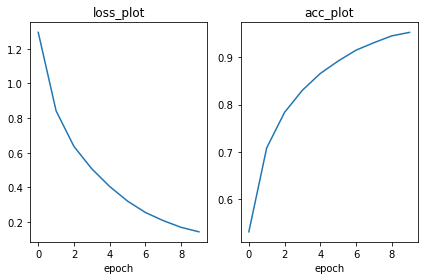

In [15]:
x = np.arange(10)

fig, axs = plt.subplots(1, 2)
axs[0].plot(x, loss_list)
axs[0].set_xlabel('epoch')
axs[0].set_title('loss_plot')

axs[1].plot(x, acc_list)
axs[1].set_xlabel('epoch')
axs[1].set_title('acc_plot')

plt.tight_layout()
plt.show()

In [16]:
trainer.test()

test_acc: 0.816


결과를 보면 test 정확도가 train 정확도에 비해 현저히 낮은 성능을 보입니다. 왜냐하면 overfitting이 일어나기 때문입니다.

### **2) Train CIFAR-10 with pre-trained VGG**

우리가 위에서 만든 VGG Network를 통해 유의미한 정확도를 달성할 수 있습니다. 그러나 더 큰 모델을 사용할 경우, 매번 처음부터 학습을 진행하는 것은 쉬운 일이 아닙니다.

따라서, 이번엔 pre-trained된 VGG model을 불러와서 linear layer만 추가적으로 학습시켜 적은 시간만으로 높은 성능을 달성하는 실습을 해보겠습니다.

PyTorch에서 공식적으로 제공하는 pre-trained model은 [Torchvision.models](https://pytorch.org/vision/stable/models.html)에 있는 해당 document에서 찾아볼 수 있습니다. 또는 종종 google이나 facebook 등에서는 자신들이 개발한 모델에 대해서 pre-trained된 weight를 이와 같이 배포합니다. 

[예시](https://github.com/google-research/simclr)

In [17]:
import torchvision.models as models
pretrained_vgg = models.vgg19_bn(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to C:\Users\delphinus/.cache\torch\hub\checkpoints\vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:52<00:00, 10.9MB/s] 


In [18]:
class Pretrained_VGG19(nn.Module):
    def __init__(self, pretrained_model):
        super(Pretrained_VGG19, self).__init__()
        # inherit the weights from the pre-trained model
        self.features = nn.Sequential(
            *list(pretrained_model.features.children())
        )
        self.linear = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
    def forward(self, x):
        x = self.features(x)
        x = x.squeeze() 
        x = self.linear(x)
        return x

In [19]:
model = Pretrained_VGG19(pretrained_vgg)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
device = 'cpu'
model.to(device)

Pretrained_VGG19(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Co

In [20]:
trainer = Trainer(trainloader = train_loader,
                testloader = test_loader,
                model = model,
                criterion = criterion,
                optimizer = optimizer,
                device = device)

loss_list, acc_list = trainer.train(epoch = 1)

782it [27:39,  2.12s/it]

epoch: 1  loss: 0.742  acc:0.752


In [21]:
trainer.test()

test_acc: 0.863


# **4. Recurrent Neural Networks(RNN)**

## **4.1 RNN**

Recurrent Neural Networks(RNN)은 CNN과 다르게 이전 출력값을 다시 입력값으로 넣으며 사용하는 순환 신경망입니다. 

<img src = "http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" height = "200px" width = "700px">

위 그림처럼 반복하는 것을 시간으로 나누어 나타낼 수 있습니다. 이러한 RNN의 은닉층 계산은 다음과 같이 진행됩니다.

<img src = "https://wikidocs.net/images/page/22886/rnn_images4-5.PNG">


$$h_t = tanh(W_x X_t + W_h h_{t-1} + b)$$

$$y_t = W_y h_t$$

이때 RNN은 zero-centered, 즉 평균이 0이여야 하기 때문에 tanh 함수를 사용합니다. 

"hello"라는 단어를 생성할 수 있도록 RNN을 학습시킨다고 가정할 때, 동작 과정은 다음과 같습니다.

![hello](_image/hello.PNG)

이때, 처음 시작할 때 h_0이 들어가야 할 텐데 대체적으로 가우시안분포로 무작위 설정을 합니다. 이때 h_0를 매 epoch마다 초기화할 수도 있다.

## **4.2 Backpropagation throught Time (BPTT)**

RNN을 학습시킬 때 loss를 구하기 위해선 시간을 거슬러 올라가며 loss를 구해야 합니다. 이때 시간 방향으로 펼친 신경망의 Backpropagation이므로 이를 BPTT라고 합니다. 

![bptt](_image/bptt.PNG)

BPTT를 이용하면 RNN을 학습할 수 있습니다. 그러나 시계열 데이터의 시간 크기가 커지는 것에 비례하여 BPTT가 소비하는 메모리도 증가합니다. 또한 시간 크기가 커지면 역전파 시의 기울기가 불안정해지는 문제도 발생합니다. 

그렇기에 큰 시계열 데이터를 취급할 때는 신경망을 적당한 길이로 끊습니다. 이를 **Truncated BPTT** 라고 합니다. 이는 잘라낸 신경망끼리 독립적으로 backpropagation을 실행합니다. 물론 순전파의 연결은 끊으면 안되고 역전파의 연결만 끊는 것임을 기억해야 합니다. 

![truncated bptt](_image/truncated_bptt.PNG)

BPTT는 RNN을 학습하는 방법이지만 기울기 소실이나 기울기 폭발 문제가 있습니다. BPTT는 $h_t= tanh(W_x X_t + W_h h_{t-1} + b)$를 역전파합니다. 덧셈은 기울기를 흘려보내기에 곰셉에 의해서 기울기는 전달됩니다. 이떄 곱셈의 역전파는 $W_h^T$가 계속해서 곱해집니다. 그렇기에 $W_h^T$가 1보다 크면 폭발하고 1보다 작으면 소실됩니다. 

## **4.3 Gradient Clipping**

기울기 폭발 대책은 **기울기 클리핑(Gradient Clipping)** 을 사용합니다. 

$$if \; \lVert \hat{g} \rVert \geq threshold \; \rightarrow \; \hat{g} = \frac{threshold}{\lVert \hat{g} \rVert} \hat{g} $$

threshold란 문턱값을 정하고 신경망에서 사용되는 모든 매개변수에 대한 기울기를 하나로 처리한다 가정하고 이를 $\hat{g}$라고 썼습니다. 이때 기울기의 크기가 threshold를 넘어가면 오른쪽 항처럼 수정합니다. 간단하지만 많은 곳에서 잘 작동됩니다.

## **4.4 LSTM(Long Short-Term Memory)**

기울기 소실 문제는 기울기 폭팔처럼 간단하게 해결되지 않습니다. 이를 해결하기 위해 RNN에 게이트를 추가하여 기울기 소실을 방지합니다. 먼저 게이트를 추가한 RNN 중 가장 대표적인 LSTM을 알아보겠습니다.

<center><img src = "http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png" height = "300px" width = "700px"></center>

### <center> <**Standard RNN**> </center>

<center><img src = "http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" height = "300px" width = "700px"></center>

### <center><**LSTM**></center>

위 두 그림은 일반적인 RNN과 LSTM을 나타냅니다. 내부 상황을 보지 않고 입출력만 봤을 때, LSTM은 입력이 하나 더 있음을 볼 수 있습니다. 그 입력은 출력되진 않으며 다음 layer로 넘어갑니다. 이를 $c$(memory cell, 기억셀)이라 하며, LSTM의 기억 매커니즘입니다. $c_t$는 시각 t에서의 LSTM의 기억이 저장되어있습니다. 이를 이용하여 기울기 소실을 방지합니다. 이제 자세한 동작을 알아보겠습니다.

### **1) Forget Gate**

<img src = "http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png" height = "300px" width = "1000px">

Forget gate는 이전 레이어에서 넘어온 기억셀에서 불필요한 기억을 지워주는 게이트입니다. 위 $\sigma$는 시그모이드 함수를 의미합니다. 시그모이드 함수를 지나면 0과 1 사이의 값이 나오는데 0에 가까울수록 정보가 많이 삭제된 것이고 1에 가까울수록 정보를 보존한 것입니다.

### **2) Input Gate**

<img src = "http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png" height = "300px" width = "1000px">

입력된 정보들을 기억셀에 새로 추가해야 합니다. 그러기 위해서 입력된 값에 tanh를 사용합니다. 이때, 모든 정보를 무비판적으로 다 수용하는 것이 아닌, 적절히 골라서 입력하도록 input gate가 동작합니다. 역시 시그모이드 함수를 지나는 값은 0 ~ 1, tanh 함수를 지나는 값은 -1 ~ 1 사이의 값이 나옵니다. 이를 가지고 선택된 기억할 정보의 양을 정하게 됩니다. 

### **3) New Memory Cell**

<img src = "http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png" height = "300px" width = "1000px">

forget gate와 input gate로 얻은 정보를 이용해 기억셀을 갱신합니다. 기억셀 중 한 줄기는 다음 레이어의 입력값으로 사용됩니다. 

forget gate와 input gate의 영향력이 여기서 드러납니다. 만약 forget gate의 출력값 $f_t$가 0이라면, 이전 시점의 셀 상태 $C_{t-1}$은 현재 시점의 $C_t$를 결정하기 위한 영향력이 0이 되면서 오직 input gate의 결과만이 $C_t$를 결정하게 됩니다.

반대로 input gate의 값인 $i_t$가 0이 된다면 $C_t$는 오직 이전 시점의 $C_{t-1}$의 값에 의해서만 결정됩니다. 이는 input gate를 완전히 닫고 forget gate만 연 상태를 의미합니다.

결과적으로 forget gate는 이전 시점의 입력을 얼마나 반영할지 의미하고, input gate는 현재 시점의 입력을 얼마나 반영할지 결정합니다.

### **4) Output Gate**

<img src = "http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png" height = "300px" width = "1000px">

Output gate는 먼저 얼마나 다음으로 흘려보낼지 $h_{t-1}$과 $x_t$로 결정합니다. 그리고 이 비율과 갱신한 기억셀을 이용해 output을 출력합니다.

LSTM이 기울기 소실을 방지하는 이유는 기억셀의 역전파에 주목해야 알 수 있습니다. 기억셀의 역전파는 곱셈과 덧셈만 있습니다. 덧셈은 기울기를 흘려보내고 곱셈은 원소별 곱으로 이루어져 있습니다. RNN은 역전파에서 계속 같은 가중치 행렬을 사용하여 행렬 곱을 사용했지만 원소별 곱셈을 사용하는 LSTM은 항상 곱해지는 값이 달라 기울기 소실을 방지할 수 있습니다.

## **4.5 GRU(Gated Recurrent Unit)**

<img src = "http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png" height = "300px" width = "1000px">


LSTM과 비슷한 생각으로 구현된 다른 방지 방법도 존재합니다. 그러나 GRU는 기억셀이 없습니다. 그리고 reset과 update라는 두 개의 게이트만 사용합니다. 

reset 게이트 $r$은 이전 은닉 상태를 얼마나 무시할지 결정합니다. 만약 $r$이 0이면 새로운 은닉 상태는 입력 $x_i$만으로 결정됩니다. 즉, 0이면 과거 상태는 완전히 무시하게 됩니다.

update 게이트 $z$는 은닉 상태를 갱신하는 게이트입니다. LSTM의 forget 게이트, input 게이트가 담당하는 것을 혼자 담당하는 것입니다. $(1-z_t) * h_{t-1}$ 부분이 forget 게이트의 역할을 합니다. 이 계산으로 인해 과거의 은닉 상태에서 잊어야 할 정보를 삭제합니다. 그리고 $z * \tilde{h}$ 부분이 input 게이트 기능을 하여 새로 추가된 정보에 가중치를 부여하게됩니다. 

이처럼 GRU는 LSTM을 더 단순하게 만든 것입니다. 따라서 LTSM보다 계산 비용을 줄이고 매개변수 개수도 줄일 수 있습니다. 

## **4.6 seq2seq** 

seq2seq(Sequence-to-Sequence)는 입력된 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 다양한 분야에 사용되는 모델입니다. 챗봇, 기계 번역 등이 대표적인 예이며 각각 질문과 대답, 입력 문장과 번역 문장을 사용합니다.  

그 중 번역기에 사용되는 구동에 대해 알아보겠습니다. 

<img src = "https://wikidocs.net/images/page/24996/%EC%8B%9C%ED%80%80%EC%8A%A4%ED%88%AC%EC%8B%9C%ED%80%80%EC%8A%A4.PNG">

위 그림은 seq2seq 모델로 만들어진 번역기가 'I am a student'라는 영어 문장을 입력 받아서, 'je suis étudiant'라는 프랑스 문장을 출력하는 모습을 보여줍니다. 그렇다면 모델 내부의 모습은 어떻게 구성되었을까요??

<img src = "https://wikidocs.net/images/page/24996/%EC%9D%B8%EC%BD%94%EB%8D%94%EB%94%94%EC%BD%94%EB%8D%94%EB%AA%A8%EB%8D%B8.PNG">

seq2seq는 크게 인토더와 디코더, 두 개의 모듈로 구성됩니다. 인코더는 입력 문장의 모든 단어들을 순차적으로 입력받은 뒤, 마지막에 이 모든 단어 정보들을 압축해서 하나의 벡터로 만드는데, 이를 컨텍스트 벡터(context vector)라고 합니다. 입력 문장의 정보가 하나의 컨텍스트 벡터로 모두 압축되면 인코더는 컨텍스트 벡터를 디코더로 전송합니다. 디코더는 컨텍스트 벡터를 받아서 번역된 단어를 한 개씩 순차적으로 출력합니다. 인코더와 디코더의 내부를 더 자세히 살펴보겠습니다.



인코더와 디코더의 내부는 사실 두 개의 RNN입니다. 입력 문장을 받는 RNN 셀을 인코더라고 하며, 출력 문장을 출력하는 RNN 셀을 디코더라고 합니다. 여기서 인코더의 RNN은 주황, 디코더의 RNN은 연두색으로 표현합니다. 그리고 RNN은 **LSTM 셀** 이나 **GRU 셀** 로 구성됩니다. 

우선 인코더를 살펴보겠습니다. 입력 문장은 단어 토큰화를 통해서 단어 단위로 쪼개지고 단어 토큰 각각은 RNN 셀의 각 시점의 입력이 됩니다. 인코더 RNN 셀은 모든 단어를 입력받은 뒤에 **인코더 RNN 셀의 마지막 시점의 은닉 상태** 를 디코더 RNN 셀로 넘겨주는데 이를 **컨텍스트 벡터** 라고 합니다. 컨텍스트 벡터는 **디코더 RNN 셀의 첫번째 은닉 상태** 에 사용됩니다. 

디코더는 기본적으로 RNNLM(RNN Language Model)입니다. 인코더를 통해 나온 컨텍스트 벡터를 LSTM layer가 입력받습니다. 이때 초기 입력의 문장의 시작을 의미하는 심볼 <sos>가 들어갑니다. 디코더는 <sos>가 입력되면, 다음에 등장할 확률이 높은 단어를 예측합니다. 첫번째 시점의 디코더 RNN 셀은 다음에 등장할 단어로 je를 다음 시점의 RNN 셀의 입력으로 입력합니다. 그리고 두번째 시점의 디코더 RNN 셀은 입력된 단어 je로부터 다시 다음에 올 단어인 suis를 예측하고 이를 반복하여 이어갑니다. 여기까지 **테스트 과정** 의 이야기입니다.

seq2seq의 훈련 과정은 테스트 과정과 조금 다릅니다. 훈련 과정에서는 디코더에게 인코더가 보낸 컨텍스트 벡터와 실제 정답을 받고 정답을 알려주면서 훈련합니다. 

이제 입,출력에 쓰이는 단어 토큰들이 있는 부분을 좀 더 확대해보겠습니다.

<img src = "https://wikidocs.net/images/page/24996/%EB%8B%A8%EC%96%B4%ED%86%A0%ED%81%B0%EB%93%A4%EC%9D%B4.PNG">

자연어 처리에서 텍스트를 벡터로 바꾸는 방법으로 주로 워드 임베딩이 사용되고 있습니다. 즉, seq2seq에서 사용되는 모든 단어들은 워드 임베딩을 통해 임베딩 벡터로서 표현된 임베딩 벡터입니다. 위 그림은 모든 단어에 대해서 임베딩 과정을 거치게 하는 단계인 임베딩 층(embedding layer)의 모습을 보여줍니다.

<img src = "https://wikidocs.net/images/page/24996/%EC%9E%84%EB%B2%A0%EB%94%A9%EB%B2%A1%ED%84%B0.PNG">

예를 들어 I, am, a, student라는 단어들에 대한 임베딩 벡터는 위와 같은 모습을 가집니다. 여기서는 그림으로 표현하고자 4로 하였지만, 보통 실제 임베딩 벡터는 수백 개의 차원을 가질 수 있습니다. 이제 하나의 RNN 셀을 확대해서 보겠습니다. 하나의 RNN 셀은 각각의 시점마다 두 개의 입력을 받습니다.

<img src = "https://wikidocs.net/images/page/24996/rnn%EA%B7%BC%ED%99%A9.PNG">

현재 시점을 t라고 할 때, RNN 셀은 t-1에서의 은닉 상태와 t에서의 입력 벡터를 입력으로 받고, t에서의 은닉 상태를 만듭니다. 이때 t에서의 은닉 상태는 바로 위에 또 다른 은닉층이나 출력층이 존재할 경우에는 위의 층으로 보내거나, 필요없으면 값을 무시할 수 있습니다. 그리고 RNN 셀은 다음 시점에 해당하는 t+1의 RNN 셀의 입력으로 현재 t에서의 은닉 상태를 입력으로 보냅니다. 

이런 구조에서 현재 시점 t에서의 은닉 상태는 과거 시점의 동일한 RNN 셀에서의 모든 은닉 상태의 값들의 영향을 누적해서 받아온 값이라고 할 수 있습니다. 그렇기 때문에 앞서 언급했던 컨텍스트 벡터는 사실 인코더에서 마지막 RNN 셀의 은닉 상태값을 말하는 것이며, 이는 입력 문장의 모든 단어 토큰들의 정보를 요약해서 담고있다고 할 수 있습니다.

디코더는 인코더의 마지막 RNN 셀의 은닉 상태인 컨텍스트 벡터를 첫번째 은닉 상태의 값으로 사용됩니다. 디코더의 첫번째 RNN 셀은 이 첫번째 은닉 상태의 값과 현재 t에서의 입력값인 <sos>로부터, 다음에 등장할 단어를 예측합니다. 그리고 이 예측된 단어는 다음 시점인 t+1 RNN에서의 입력값이 되고, 이 t+1에서의 RNN 또한 이 입력값과 t에서의 은닉 상태로부터 t+1에서의 출력 벡터, 즉 또 다시 다음에 등장할 단어를 예측하게 됩니다. 디코더가 다음에 등장할 단어를 예측하는 부분을 확대해보겠습니다. 

<img src = "https://wikidocs.net/images/page/24996/decodernextwordprediction.PNG">

출력 단어로 나올 수 있는 단어들은 다양한 단어들이 있습니다. seq2seq 모델은 선택될 수 있는 모든 단어들로부터 하나의 단어를 골라서 예측해야 합니다. 이를 예측하기 위해서 쓸 수 있는 함수로 소프트맥스 함수를 사용합니다. 디코더에서 각 시점의 RNN 셀에서 출력 벡터가 나오면, 해당 벡터는 소프트맥스 함수를 통해 출력 시퀀스의 각 단어별 확률값을 반환하고, 디코더는 출력 단어를 결정합니다. 

이 외에도 컨텍스트 벡터를 디코더의 초기 은닉 상태로만 사용하거나, 컨텍스트 벡터를 디코더가 단어를 예측하는 매 시점마다 하나의 입력으로 사용할 수 있으며 입력 데이터 반전(reverse), 엿보기(peeky) 등의 트릭도 있습니다. 그리고 다음 챕터에서 배울 어텐션 매커니즘이라는 방법을 통해 문맥을 더욱 반영할 수도 있습니다. 

밑의 그림은 전체적인 동작을 볼 수 있습니다.

<img src = "https://docs.chainer.org/en/v7.8.0/_images/seq2seq.png" height = "600px" width = "1000px">

## **4.7 깊은 순환 신경망**

앞서 배웠던 기본 RNN을 다시 생각해보겠습니다. 일반 RNN은 은닉층을 1개 가지고 있습니다. 근데 여기서 1개를 더 추가하여 2개의 은닉층을 사용하는 것입니다. 밑의 그림과 같은 모습이 나타납니다.

<img src = "https://wikidocs.net/images/page/22886/rnn_image4.5_finalPNG.PNG">

이떄 마지막 output만 사용하는 것이 아니라 각 은닉층마다 나오는 output을 가중 평균을 해서 최종 output을 구할 수도 있습니다. 또한 dropout도 각 layer마다 다르게 적용할 수도 있습니다. 대체적으로 hiddeb layer의 size를 input layer의 size의 4배를 할 때 가장 성능이 좋습니다. 만약 두 layer의 size가 같다면 (원래는 고정되어있던) 워드 임베딩과 (매 epoch마다 학습되었던) 가중치를 같이 학습하던가, 결합하여 사용할 수도 있습니다. 이렇게 되면 워드 임베딩 벡터도 학습을 시킬 수는 있게됩니다.

## **4.8 양방향 순환 신경망**

양방향 순환 신경망(Bidirectional Recurrent Neural Network)은 시점 t에서의 출력값을 예측할 때, 이전 시점의 데이터뿐만 아니라 이후 데이터로도 예측하겠다는 아이디어를 도입한 것입니다.

영어 빈칸 채우기 문제에 비유해보겠습니다.

> Exercise is very effective at [      ] belly fat.
>
> 1) reducing
> 2) increasing
> 3) multiplying

'운동은 복부 지방을 [] 효과적이다'라는 영어 문장이고 정답은 reducing입니다. 그런데 위의 영어 빈 칸 채우기 문제를 잘 생각하면 정답을 찾기 위해서는 이전에 나온 단어들만으로는 부족합니다. 목적어인 belly fat(복부 지방)을 모르는 상태라면 정답을 결정하기 어렵습니다.

즉, RNN이 과거 시점(time step)의 데이터들을 참고해서, 찾고자하는 정답을 예측하지만 실제 문제에서는 과거 시점의 데이터만 고려하는 것이 아니라 향후 시점의 데이터에 힌트가 있는 경우도 있는 것입니다. 그래서 이전 시점의 데이터뿐만 아니라, 이후 시점의 데이터도 힌트로 활용하기 위해서 고안된 것이 양방향 RNN입니다.

<img src = "https://wikidocs.net/images/page/22886/rnn_image5_ver2.PNG">

양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용합니다. 첫 번째 메모리 셀은 앞서 배운 것처럼 **`앞 시점의 은닉 상태(Forward States)`** 를 전달받아 현재의 은닉 상태를 계산합니다. 위 그림에서 주황색 메모리 셀에 해당합니다. 두 번째 메모리 셀은 앞 시점 은닉 상태가 아니라 **`뒤 시점의 은닉 상태(Backward States)`** 를 전달 받아 현재의 은닉 상태를 계산합니다. 위 그림에서 초록색 메모리 셀에 해당됩니다. 그리고 이 두 개의 값 모두가 출력층에서 출력값을 예측하기 위해 사용됩니다.

물론 양방향 RNN도 다수의 은닉층을 가질 수 있습니다. 아래의 그림은 양방향 RNN에서 은닉층이 1개 더 추가되어 2개의 은닉층을 가지는 깊은 양방향 순환 신경망의 모습입니다.

<img src = "https://wikidocs.net/images/page/22886/rnn_image6_ver3.PNG">

다른 인공 신경망도 마찬가지지만, 은닉층을 무조건 추가한다고 해서 모델의 성능이 좋아지지 않습니다. 은닉층을 추가하면, 학습할 수 있는 양이 많아지지만 또한 반대로 훈련 데이터 또한 그만큼 많이 필요합니다. 

## **실습1. Language Model**

이번 실습은 RNN기반의 Language Model을 구현해서 텍스트를 직접 생성해보는 실습을 진행하겠습니다.

### **0) Import packages**

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import tqdm
import os
import random
import time
import datetime

# for reproducibility
random.seed(1234)
np.random.seed(1234)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

### **1) DataLoader**

이전의 실습들에서 사용한 것과 마찬가지로, PyTorch style의 dataloader를 먼저 만들어 두겠습니다.

#### Dataset

이번 실습 데이터셋은 Wikipedia에 있는 영문 글들을 가져온 WikiTree dataset입니다. 이 데이터는 가장 작은 WikiTree dataset에서 자주 사용되지 않는 단어나 영어가 아닌 단어들은 'unkown'으로 이미 전처리가 되어있습니다.

In [13]:
import urllib
with urllib.request.urlopen('https://raw.githubusercontent.com/yunjey/pytorch-tutorial/master/tutorials/02-intermediate/language_model/data/train.txt') as f:
    data = f.readlines()

In [14]:
print('num_sentence:',len(data))
data[100]

num_sentence: 42068


b" plans that give advertisers discounts for maintaining or increasing ad spending have become permanent <unk> at the news <unk> and underscore the fierce competition between newsweek time warner inc. 's time magazine and <unk> b. <unk> 's u.s. news & world report \n"

In [15]:
seq_length_list = []
for line in data:
    seq_length_list.append(len(line.split()))

counts, bins = np.histogram(seq_length_list, bins=20)

In [16]:
# 왜 여기서만 kernel이 죽는가
#plt.hist(bins[:-1], bins, weights=counts)
#plt.show()

![plot](_image/plot.PNG)

데이터에 있는 문장 길이들의 histogram을 볼 때, 대부분의 data의 문장 길이가 50에 미치지 못하기 때문에 model에 집어넣을 최대 문장 길이를 50으로 세팅합니다.

In [17]:
max_seq_len = 50

#### Build Dictionary

먼저 text 데이터를 모델에 넣어주기 위해서는 text에 존재하는 단어들을 index로 변환해주어야 합니다.

이를 위해서는 단어를 index로 변환해주는 word2idx dictionary와 다시 index를 단어로 변환해주는 idx2word dictionary를 만들어야 합니다.

In [24]:
def build_dictionary(data, max_seq_len):
    word2idx = {}
    idx2word = {}
    ## Build Dictionary
    word2idx['<pad>'] = 0
    word2idx['<unk>'] = 1 # keyerror가 났을 때 출력할 value
    idx2word[0] = '<pad>'
    idx2word[1] = '<unk>' 
    idx = 2
    for line in data:
        words = line.decode('utf-8').split()
        words = words[:max_seq_len]        
        # Build Dictionary to convert word to index and index to word
        for word in words:
            if word not in word2idx:
                word2idx[word] = idx
                idx2word[idx] = word
                idx += 1

    return word2idx, idx2word

word2idx, idx2word = build_dictionary(data, max_seq_len)

In [25]:
print(len(word2idx), len(idx2word))

if len(word2idx) == len(idx2word) == 10000:
    print("Test Passed!")
else:
    raise AssertionError

10000 10000
Test Passed!


#### Preprocessing

이제 앞서 만든 dictionary를 이용해서 text로된 데이터셋을 index들로 변환시키겠습니다.

In [30]:
def preprocess(data, word2idx, idx2word, max_seq_len):
    tokens = []
    for line in data:
        words = line.decode('utf-8').split()
        words = words[:max_seq_len]
        # Convert dataset with tokens
        # For each line, append <pad> token to match the number of max_seq_len
        words += ["<pad>"] * (max_seq_len - len(words))
        for word in words:
            tokens.append(word2idx[word])

    return tokens

tokens = preprocess(data, word2idx, idx2word, max_seq_len)

In [31]:
if len(tokens) == 2103400:
    print("Test Passed!")
else:
    raise AssertionError

Test Passed!


In [32]:
tokens = np.array(tokens).reshape(-1, max_seq_len)
print(tokens.shape)
tokens[100]

(42068, 50)


array([745,  93, 746, 739, 747, 181, 748, 467, 749, 740, 750, 154, 751,
       752,   1, 160,  32, 753,   1,  48, 754,  32, 755, 756, 757, 728,
       555, 758,  99, 119, 555, 733,  48,   1, 759,   1, 119, 237, 753,
       230, 760, 347,   0,   0,   0,   0,   0,   0,   0,   0])

#### DataLoader

이제 전처리된 dataset을 활용하여 PyTorch style의 dataset과 dataloader를 만들도록 하겠습니다.

Token형태의 데이터를 PyTorch 스타일의 dataset으로 만들 때 주의할 점은, 추후 embedding matrix에서 indexing을 해주기 위해서 각 token이 LongTensor 형태로 정의되어야 한다는 점입니다. 

In [33]:
class LMDataset(torch.utils.data.Dataset):
    def __init__(self, tokens):
        super(LMDataset, self).__init__()
        self.PAD = 0
        self.UNK = 1
        self.tokens = tokens
        self._getitem(2)

    def _getitem(self, index):
        X = self.tokens[index]
        y = np.concatenate((X[1:], [self.PAD]))

        X = torch.from_numpy(X).unsqueeze(0).long()
        y = torch.from_numpy(y).unsqueeze(0).long()

        return X, y

    def __getitem__(self, index):
        X = self.tokens[index]
        y = np.concatenate((X[1:], [self.PAD]))

        X = torch.from_numpy(X).long()
        y = torch.from_numpy(y).long()

        return X, y

    def __len__(self):
        return len(self.tokens)

In [34]:
batch_size = 64
dataset = LMDataset(tokens)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

print(len(dataset))
print(len(dataloader))

42068
658


### **2) Model**

이제 Language Modeling을 위한 Recurrent Model을 직접 만들어보도록 하겠습니다. 

Standard한 RNN model은 기울기 소실 문제에 취약하기 때문에, 이번 실습에선 LSTM RNN을 사용하겠습니다.

#### LSTM

LSTM model의 전체적인 구조와 각 gate의 수식은 아래와 같습니다.

![](https://drive.google.com/uc?export=view&id=1n93tpNW55Xl4GxZNcJcbUVRhuNCGH38h)

![](https://drive.google.com/uc?export=view&id=1nH9U5iD9cO6OVVTbrx-LjypRvcWzbOCU)

LSTM의 자세한 동작방식이 궁금하신 분은 아래의 블로그를 참조해주세요.

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [41]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMCell, self).__init__()
        # input-gate
        self.Wi = nn.Linear(input_size + hidden_size, hidden_size)
        # forget-gate
        self.Wf = nn.Linear(input_size + hidden_size, hidden_size)
        # gate-gate
        self.Wg = nn.Linear(input_size + hidden_size, hidden_size)
        # output-gate
        self.Wo = nn.Linear(input_size + hidden_size, hidden_size)

        # non-linearity
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, x, h_0, c_0):
        """
        Inputs
            input (x): [batch_size, input_size]
            hidden_state (h_0): [batch_size, hidden_size]
            cell_state (c_0): [batch_size, hidden_size]
        Outputs
            next_hidden_state (h_1): [batch_size, hidden_size]
            next_cell_state (c_1): [batch_size, hidden_size]    
        """
        h_1, c_1 = None, None
        input = torch.cat((x, h_0), 1) 
        # Implement LSTM cell as noted above
        i = self.sigmoid(self.Wi(input))
        f = self.sigmoid(self.Wf(input))
        g = self.tanh(self.Wg(input))
        o = self.sigmoid(self.Wo(input))
        c_1 = f * c_0 + g * i
        h_1 = self.tanh(c_1) * o        

        return h_1,c_1


In [42]:
def test_lstm():
    batch_size = 2
    input_size = 5
    hidden_size = 3

    #torch.manual_seed(1234)
    lstm = LSTMCell(input_size ,hidden_size)
    def init_weights(m):
        if isinstance(m, nn.Linear):
            torch.nn.init.constant_(m.weight, 0.1)
            m.bias.data.fill_(0.01)
    lstm.apply(init_weights)

    x = torch.ones(batch_size, input_size) 
    hx = torch.zeros(batch_size, hidden_size) 
    cx = torch.zeros(batch_size, hidden_size)

    hx, cx = lstm(x, hx, cx)
    assert hx.detach().allclose(torch.tensor([[0.1784, 0.1784, 0.1784], 
                                            [0.1784, 0.1784, 0.1784]]), atol=2e-1), \
            f"Output of the hidden state does not match."
    assert cx.detach().allclose(torch.tensor([[0.2936, 0.2936, 0.2936], 
                                            [0.2936, 0.2936, 0.2936]]), atol=2e-1), \
            f"Output of the cell state does not match."

    print("==LSTM cell test passed!==")

test_lstm()

==LSTM cell test passed!==


#### Language Model

이제, 위에서 정의한 LSTM Cell을 활용하여 아래와 같은 Language Model을 만들어보도록 하겠습니다.

![](https://drive.google.com/uc?export=view&id=1nMAbL-g31nERM44dgohA3k9Vj_92hIh-)

In [43]:
class LanguageModel(nn.Module):
    def __init__(self, input_size=64, hidden_size=64, vocab_size=10000):
        super(LanguageModel, self).__init__()
        
        self.input_layer = nn.Embedding(vocab_size, input_size)
        self.hidden_layer = LSTMCell(input_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, vocab_size)


    def forward(self, x, hx, cx, predict=False):
        """
        Inputs
            input (x): [batch_size]
            hidden_state (h_0): [batch_size, hidden_size]
            cell_state (c_0): [batch_size, hidden_size]
            predict: whether to predict and sample the next word
        Outputs
            output (ox): [batch_size, hidden_size]
            next_hidden_state (h_1): [batch_size, hidden_size]
            next_cell_state (c_1): [batch_size, hidden_size]    
        """
        x = self.input_layer(x)
        hx, cx = self.hidden_layer(x, hx, cx)
        ox = self.output_layer(hx)

        if predict == True:
            probs = F.softmax(ox, dim=1)
            # torch distribution allows sampling operation
            # see https://pytorch.org/docs/stable/distributions.html
            dist = torch.distributions.Categorical(probs)
            ox = dist.sample()

        return ox, hx, cx  

### **3) Trainer**

In [44]:
class Trainer():
    def __init__(self, 
                word2idx, 
                idx2word,
                dataloader, 
                model, 
                criterion,
                optimizer, 
                device):
        """
        dataloader: dataloader
        model: langauge model
        criterion: loss function to evaluate the model (e.g., BCE Loss)
        optimizer: optimizer for model
        """
        self.word2idx = word2idx
        self.idx2word = idx2word
        self.dataloader = dataloader
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device
        
    def train(self, epochs = 1):
        self.model.to(self.device)
        start_time = time.time()
        for epoch in range(epochs):
            losses = []
            for iter, (x_batch, y_batch) in tqdm.tqdm(enumerate(self.dataloader)):
                self.model.train()
                
                batch_size, max_seq_len = x_batch.shape
                x_batch = x_batch.to(self.device)
                y_batch = y_batch.to(self.device)

                # initial hidden-states
                hx = torch.zeros(batch_size, hidden_size).to(self.device)
                cx = torch.zeros(batch_size, hidden_size).to(self.device)

                # Implement LSTM operation
                ox_batch = []
                # Get output logits for each time sequence and append to the list, ox_batch
                for s_idx in range(max_seq_len):
                    x = x_batch[:, s_idx]
                    ox, hx, cx = self.model(x, hx, cx)
                    ox_batch.append(ox)

                # outputs are ordered by the time sequence
                ox_batch = torch.cat(ox_batch).reshape(max_seq_len, batch_size, -1)
                ox_batch = ox_batch.permute(1,0,2).reshape(batch_size*max_seq_len, -1)
                y_batch = y_batch.reshape(-1)

                self.model.zero_grad()
                loss = self.criterion(ox_batch, y_batch)
                loss.backward()
                self.optimizer.step()
                losses.append(loss.item())

            end_time = time.time() - start_time
            end_time = str(datetime.timedelta(seconds=end_time))[:-7]
            print('Time [%s], Epoch [%d/%d], loss: %.4f'
                % (end_time, epoch+1, epochs, np.mean(losses)))
            if epoch % 5 == 0:
                generated_sentences = self.test()
                print('[Generated Sentences]')
                for sentence in generated_sentences:
                    print(sentence)
            
    def test(self):
        # Test model to genereate the sentences
        self.model.eval()
        num_sentence = 5
        max_seq_len = 50

        # initial hidden-states
        outs = []
        x = torch.randint(0, 10000, (num_sentence,)).to(self.device)
        hx = torch.zeros(num_sentence, hidden_size).to(self.device)
        cx = torch.zeros(num_sentence, hidden_size).to(self.device)

        outs.append(x)
        with torch.no_grad():
            for s_idx in range(max_seq_len-1):
                x, hx, cx = self.model(x, hx, cx, predict=True)
                outs.append(x)
        outs = torch.cat(outs).reshape(max_seq_len, num_sentence)
        outs = outs.permute(1, 0)
        outs = outs.detach().cpu().numpy()

        sentences = []
        for out in outs:
            sentence = []
            for token_idx in out:
                word = self.idx2word[token_idx]
                sentence.append(word)
            sentences.append(sentence)

        return sentences

In [45]:
lr = 1e-2
input_size = 128
hidden_size = 128
batch_size = 256

dataset = LMDataset(tokens)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
model = LanguageModel(input_size=input_size, hidden_size=hidden_size)
# NOTE: you should use ignore_index to ignore the loss from predicting the <PAD> token
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(model.parameters(), lr=lr)

trainer = Trainer(word2idx = word2idx,
                idx2word = idx2word,
                dataloader=dataloader, 
                model = model,
                criterion=criterion,
                optimizer = optimizer,
                device=device)

trainer.train(epochs=50)

165it [11:09,  4.06s/it]


Time [0:11:09], Epoch [1/50], loss: 6.0897
[Generated Sentences]
['demanding', 'following', 'all', 'policy', 'for', 'donaldson', 'lufkin', '&', 'equipment', 'denied', 'him', 'michael', 'cutting', 'the', 'products', 'and', 'we', 'has', 'had', 'already', 'long', 'inherited', 'over', 'bad', 'for', 'trouble', 'on', 'sales', 'saying', 'any', 'as', 'it', 'was', 'a', 'level', '<unk>', 'for', 'a', '<unk>', 'starts', 'of', 'the', 'past', 'certain', 'rights', 'of', 'use', 'rates', 'million', 'or']
['boyd', 'improved', 'anti-drug', 'six', 'months', 'until', 'the', 'loans', 'in', 'general', 'electric', 'co.', 'broke', 'only', 'new', '<unk>', 'would', "n't", 'turn', 'us', '$', 'N', 'million', 'of', 'about', '$', 'N', 'a', 'share', 'in', 'a', 'capita', 'or', 'mortgage', 'and', 'do', 'is', 'willing', 'of', 'communist', 'investor', "'s", 'upscale', 'directors', 'will', 'on', 'barriers', 'over', 'anybody', 'to']
['labeled', 'scuttle', 'invest', 'for', 'the', 'purchasing', 'earthquake', 'the', 'underwri

165it [09:56,  3.62s/it]


Time [0:21:06], Epoch [2/50], loss: 5.2251


165it [09:44,  3.54s/it]


Time [0:30:51], Epoch [3/50], loss: 4.9095


165it [09:29,  3.45s/it]


Time [0:40:21], Epoch [4/50], loss: 4.7047


165it [09:32,  3.47s/it]


Time [0:49:53], Epoch [5/50], loss: 4.5483


165it [09:50,  3.58s/it]


Time [0:59:44], Epoch [6/50], loss: 4.4220
[Generated Sentences]
['profit', 'creates', 'two', 'more', 'willing', 'to', 'ensure', 'the', 'tv', 'of', 'a', 'dozen', 'examples', 'of', 'the', 'company', 'open', '<unk>', 'form', 'as', 'the', 'companies', 'esso', 'totaled', '$', 'N', 'million', 'in', '<unk>', 'in', 'which', 'a', 'transaction', 'service', 'wo', "n't", 'be', 'one', 'more', 'attractive', 'and', 'the', 'growth', 'of', 'the', 'amount', 'of', 'market', 'volatility', 'especially']
['season', 'competent', 'systems', 'to', 'a', 'doctor', 'is', 'counting', 'on', 'kidder', "'s", 'world-wide', 'agency', 'while', 'produce', 'significant', 'cnw', 'stocks', '<unk>', 'on', 'hong', 'kong', "'s", 'statement', 'N', 'of', 'the', 'securities', 'and', 'exchange', 'rate', 'increases', 'rose', 'in', 'power', 'and', 'will', 'go', 'if', 'certain', 'of', 'its', 'pricing', 'plan', 'such', 'as', '<unk>', 'blocks', 'driving', 'into']
['hunt', 'project', 'gained', 'N', 'N', 'in', 'far', 'on', 'the', 'sale'

165it [09:31,  3.47s/it]


Time [1:09:16], Epoch [7/50], loss: 4.3142


165it [09:29,  3.45s/it]


Time [1:18:45], Epoch [8/50], loss: 4.2237


165it [09:29,  3.45s/it]


Time [1:28:15], Epoch [9/50], loss: 4.1437


165it [09:24,  3.42s/it]


Time [1:37:40], Epoch [10/50], loss: 4.0720


165it [09:06,  3.31s/it]


Time [1:46:46], Epoch [11/50], loss: 4.0075
[Generated Sentences]
['tilt', 'stocks', 'new', 'technologies', 'jerry', 'mich.', 'auto', 'maker', 'stores', 'inc.', 'marketing', 'acquired', 'last', 'spring', 'appears', 'to', 'be', 'meeting', 'dropped', 'N', 'N', 'to', 'N', 'after', 'the', 'state', 'of', 'an', '<unk>', 'of', 'a', 'big', 'players', "'", 'listed', 'travel', 'and', 'had', 'agreed', 'in', 'the', 'u.s.', 'budget', 'on', 'over', 'three', 'years', 'that', 'expects', 'would']
['host', 'environmentalism', 'services', 'say', 'that', 'the', 'industrial', 'average', 'will', 'be', 'called', 'for', 'one', '<unk>', 'and', 'relationship', 'because', 'takeover', 'stocks', 'will', 'remain', 'on', 'the', 'community', 'against', 'N', 'federal', 'agencies', 'including', 'the', '<unk>', 'assets', 'of', 'u.s.', 'price', 'as', 'part', 'of', 'this', 'savings', 'bank', '<unk>', 'its', 'sunnyvale', 'manufacturing', 'coatings', 'as', 'mcdonald', '&', 'co.']
['cost', 'note', 'that', 'must', 'be', 'repl

165it [09:04,  3.30s/it]


Time [1:55:51], Epoch [12/50], loss: 3.9520


165it [09:04,  3.30s/it]


Time [2:04:56], Epoch [13/50], loss: 3.9014


165it [09:07,  3.32s/it]


Time [2:14:03], Epoch [14/50], loss: 3.8554


165it [09:06,  3.31s/it]


Time [2:23:10], Epoch [15/50], loss: 3.8118


165it [09:06,  3.31s/it]


Time [2:32:16], Epoch [16/50], loss: 3.7738
[Generated Sentences]
['larsen', '&', 'toubro', 'had', 'agreed', 'to', 'sell', 'its', 'obligations', 'under', 'the', 'spinoff', 'in', '<unk>', 'n.y.', 'industry', 'is', 'negotiating', 'with', 'the', 'west', 'coast', 'and', 'sen.', 'kennedy', 'and', 'invited', 'meredith', 'were', 'concerned', 'with', 'our', 'first', 'mainframe', 'deliveries', 'in', 'north', 'carolina', 'holding', 'its', 'withdrawal', 'from', 'sir', 'james', 'goldsmith', 'intends', 'to', 'sell', 'its', 'responsibilities']
['improvements', 'absorbed', 'for', 'the', 'first', 'humans', 'will', 'be', 'negative', 'have', 'been', '<unk>', 'some', '<unk>', 'with', 'the', 'offering', 'cuts', 'that', 'might', 'go', 'along', 'to', 'the', 'ratings', 'point', 'by', 'staff', 'up', 'N', 'after', 'N', 'N', 'of', 'which', 'wang', "'s", 'eight', 'institute', 'of', 'new', 'york-based', 'dealers', 'also', 'u.s.', 'attorney', 'general', 'for', 'spare', 'emergency']
['worsen', 'earnings', 'per', 'c

165it [09:03,  3.29s/it]


Time [2:41:20], Epoch [17/50], loss: 3.7383


165it [09:08,  3.32s/it]


Time [2:50:29], Epoch [18/50], loss: 3.7061


165it [09:06,  3.31s/it]


Time [2:59:35], Epoch [19/50], loss: 3.6777


165it [09:05,  3.30s/it]


Time [3:08:40], Epoch [20/50], loss: 3.6492


165it [09:07,  3.32s/it]


Time [3:17:48], Epoch [21/50], loss: 3.6227
[Generated Sentences]
['morris', 'homes', 'rose', 'at', '$', 'N', 'at', 'par', 'and', 'N', 'tentatively', 'priced', 'at', 'N', 'million', 'guilders', 'up', 'N', 'cents', 'in', 'composite', 'trading', 'on', 'the', 'benchmark', '30-year', 'bond', 'ended', 'higher', 'in', 'quiet', 'dealings', 'monday', 'largely', 'by', 'salomon', 'inc.', 'said', 'third-quarter', 'net', 'income', 'plunged', 'N', 'to', 'N', 'N', 'on', 'loans', 'to', 'a']
['widespread', 'wells', 'rich', 'co', 'closed', 'an', 'annual', 'rate', 'of', 'N', 'N', 'of', 'the', 'european', 'stock', 'in', 'heavy', 'exchange', 'N', 'shares', 'are', 'scheduled', 'to', 'be', 'about', 'N', 'million', 'shares', 'in', 'N', 'the', 'tender', 'offer', 'will', 'place', 'payment', 'in', 'cash', 'charges', 'partly', 'because', 'of', 'its', 'problems', 'for', 'campeau', 'employees', 'and', 'jaguar', 'became']
['administrative', 'manipulation', 'of', 'the', 'banks', "'", 'expectations', '$', 'N', 'milli

165it [09:04,  3.30s/it]


Time [3:26:53], Epoch [22/50], loss: 3.5981


165it [09:06,  3.31s/it]


Time [3:35:59], Epoch [23/50], loss: 3.5752


165it [09:05,  3.31s/it]


Time [3:45:05], Epoch [24/50], loss: 3.5552


165it [09:07,  3.32s/it]


Time [3:54:12], Epoch [25/50], loss: 3.5378


165it [09:04,  3.30s/it]


Time [4:03:17], Epoch [26/50], loss: 3.5174
[Generated Sentences]
['holmes', 'averages', 'by', 'tax', 'seasonally', 'adjusted', 'grew', 'N', 'N', 'to', 'N', 'N', 'on', 'tuesday', 'that', 'banks', 'will', 'be', 'determined', 'because', 'of', 'japan', 'for', 'bankers', 'corp.', 'said', 'the', 'transaction', 'is', 'using', 'privately', 'interest', 'under', 'shares', 'of', 'stock', 'prices', 'to', 'start', 'earlier', 'loan', 'guarantees', 'executed', 'or', '<unk>', 'natural', 'gas', 'when', 'retail', 'sales']
['lower', 'feed', 'prices', 'prices', 'closed', 'slightly', 'higher', 'in', 'zurich', 'brussels', 'milan', 'and', 'operations', 'in', 'fact', 'the', 'british', 'tobacco', 'market', 'wo', "n't", 'disrupt', 'plans', 'for', 'the', 'face', 'value', 'payable', 'short', 'interest', 'in', 'profit', 'for', 'this', 'year', 'matching', 'funds', 'would', 'gain', 'as', 'a', 'significant', 'net', 'loss', 'and', 'the', 'administration', 'said', 'the', 'state']
['hinted', 'recall', 'georgia', 'led',

165it [09:04,  3.30s/it]


Time [4:12:22], Epoch [27/50], loss: 3.5039


165it [09:04,  3.30s/it]


Time [4:21:26], Epoch [28/50], loss: 3.4879


165it [09:06,  3.32s/it]


Time [4:30:33], Epoch [29/50], loss: 3.4716


165it [09:08,  3.32s/it]


Time [4:39:41], Epoch [30/50], loss: 3.4584


165it [10:29,  3.82s/it]


Time [4:50:11], Epoch [31/50], loss: 3.4462
[Generated Sentences]
['stemming', 'from', 'tax-loss', 'carry-forward', 'wheat', 'currently', 'holds', 'N', 'octel', 'rose', 'N', 'N', 'to', 'N', 'N', 'in', 'N', '<unk>', 'added', 'N', 'to', 'N', 'N', 'of', 'residents', 'more', 'than', 'expected', 'sales', 'of', 'mips', 'earnings', 'for', 'several', 'for', 'seasonal', 'control', 'which', 'a', 'stock', 'split', 'in', 'august', 'to', '<unk>', 'u.s.', 'goods', 'and', 'services', 'will']
['jose', 'informed', 'after', 'using', 'a', 'controversial', 'junk-bond', 'report', 'showing', 'up', 'its', 'plan', 'to', 'raise', 'that', 'krasnoyarsk', 'may', 'be', 'phased', 'out', 'by', 'promotion', 'with', 'the', 'nasdaq', 'composite', 'wage', 'dean', 'plus', 'switzerland', 'and', 'N', 'a.m.', 'and', 'no', 'pieces', 'off', 'in', '<unk>', 'lives', 'that', '<unk>', 'affected', 'them', 'along', 'alaska', 'ltd.', 'the', 'world', "'s"]
['warning', 'against', 'a', 'series', 'of', '<unk>', 'which', 'promises', 'wor

165it [10:27,  3.80s/it]


Time [5:00:38], Epoch [32/50], loss: 3.4357


165it [10:43,  3.90s/it]


Time [5:11:22], Epoch [33/50], loss: 3.4272


165it [10:15,  3.73s/it]


Time [5:21:37], Epoch [34/50], loss: 3.4126


165it [10:39,  3.88s/it]


Time [5:32:17], Epoch [35/50], loss: 3.4039


165it [10:18,  3.75s/it]


Time [5:42:35], Epoch [36/50], loss: 3.3944
[Generated Sentences]
['not', 'counting', 'the', '<unk>', 'and', 'the', '<unk>', 'probably', 'would', 'be', 'taking', 'numbers', 'of', 'people', 'who', 'are', 'trying', 'to', 'contribute', 'to', 'see', 'other', 'fronts', 'by', 'granting', 'inc.', 'of', 'the', 'lower-than-expected', 'increase', 'in', 'the', 'recovery', 'in', 'the', 'east', '<unk>', 'of', '<unk>', '<unk>', 'as', 'having', 'profit', 'during', 'the', 'market', 'made', 'they', 'did', "n't"]
['smoothly', 'listen', 'employed', 'by', 'N', 'metric', 'tons', 'of', 'wheat', 'cards', 'according', 'to', 'officers', 'each', 'group', 'said', 'it', 'extended', 'a', 'total', 'gain', 'attributable', 'in', 'over', 'which', 'the', 'dollar', 'to', 'reopen', 'today', 'or', 'those', 'maturities', 'rose', 'by', 'N', 'million', 'francs', 'us$', 'N', 'million', 'of', 'north', 'debt', 'accord', 'are', 'expected', 'to', 'begin', 'operations']
['miss', 'conservatives', 'are', 'going', 'to', 'lose', 'some

165it [10:06,  3.68s/it]


Time [5:52:42], Epoch [37/50], loss: 3.3887


165it [10:12,  3.71s/it]


Time [6:02:54], Epoch [38/50], loss: 3.3763


165it [10:06,  3.68s/it]


Time [6:13:01], Epoch [39/50], loss: 3.3678


165it [09:59,  3.63s/it]


Time [6:23:00], Epoch [40/50], loss: 3.3611


165it [09:06,  3.31s/it]


Time [6:32:07], Epoch [41/50], loss: 3.3539
[Generated Sentences]
['restrict', 'paper', 'risk', 'of', 'liability', 'have', 'been', 'pop', 'because', 'the', 'national', 'will', 'go', 'due', 'against', 'ms.', 'brief', 'puts', 'me', 'during', 'its', 'most', 'the', 'gramm-rudman', 'cuts', 'will', 'call', 'the', 'federal', 'economy', '<unk>', 'long', 'strange', 'payment', 'base', 'which', 'which', 'had', 'taken', 'on', 'prices', 'to', 'sell', 'increasing', 'competition', 'in', 'the', 'bidding', 'wars', 'to']
['tens', 'intact', 'to', '$', 'N', 'reflecting', 'share', 'from', 'the', 'solutions', 'to', 'issue', 'of', 'maturing', 'though', 'they', 'do', "n't", 'introduce', 'a', 'filing', 'on', 'behalf', 'of', 'its', 'products', 'are', 'ignoring', 'by', 'an', 'overhaul', 'that', 'last', 'week', "'s", 'rail', 'and', 'hurricane', 'hugo', 'which', 'had', 'been', '<unk>', 'most', 'painfully', 'resorts', 'to', 'drexel', 'the', 'security']
['yeast', 'covering', 'the', 'heart', 'of', 'lufthansa', 'jal',

165it [09:02,  3.29s/it]


Time [6:41:10], Epoch [42/50], loss: 3.3477


165it [09:07,  3.32s/it]


Time [6:50:17], Epoch [43/50], loss: 3.3422


165it [09:04,  3.30s/it]


Time [6:59:22], Epoch [44/50], loss: 3.3393


165it [09:03,  3.29s/it]


Time [7:08:25], Epoch [45/50], loss: 3.3367


165it [09:07,  3.32s/it]


Time [7:17:33], Epoch [46/50], loss: 3.3309
[Generated Sentences]
['friend', 'represented', 'four', 'of', 'the', 'guarantee', 'for', 'the', 'past', 'few', 'days', 'they', 'were', '<unk>', 'one', 'percentage', 'point', 'less', 'than', 'for', 'record', 'declines', 'and', 'it', 'is', 'reset', 'then', 'is', 'a', 'cut', 'in', 'the', 'market', 'public', 'subsidies', 'which', '<unk>', '$', 'N', 'billion', 'of', 'the', 'company', "'s", 'earning', 'loans', 'and', 'repay', '$', 'N']
['welcomed', 'hatch', 'stuff', 'gets', 'too', 'broker', 'notes', 'they', 'could', "n't", 'resume', 'production', 'in', 'sci', 'tv', 'stocks', 'in', 'futures', 'to', 'make', 'the', 'tokyo', 'and', 'highland', 'valley', 'mine', 'in', 'the', 'restaurant', 'and', 'financial', 'services', 'which', 'has', 'been', 'expected', 'to', 'reach', 'that', 'when', 'the', 'banks', 'will', 'move', 'out', 'reassuring', 'and', 'hospitals', 'to', 'fuel']
['conspiracy', 'granted', 'a', 'move', 'said', 'in', 'the', 'great', 'depression', 

165it [09:08,  3.32s/it]


Time [7:26:41], Epoch [47/50], loss: 3.3211


165it [09:07,  3.32s/it]


Time [7:35:49], Epoch [48/50], loss: 3.3174


165it [09:10,  3.34s/it]


Time [7:44:59], Epoch [49/50], loss: 3.3160


165it [09:42,  3.53s/it]

Time [7:54:42], Epoch [50/50], loss: 3.3092


## **실습2. 파이토치를 활용하여 LSTM 사용하기**

이번 실습에선 PyTorch를 활용한 LSTM 사용법을 익히겠습니다.

> Reference: https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

torch.nn을 활용하여 LSTM cell을 생성하는 방법은 다음과 같습니다.

- input_size: The number of expected features in the input x
- hidden_size: The number of features in the hidden state h

lstm = nn.LSTM(input_size, hidden_size)

In [2]:
# input_size: 3, hidden_size: 3으로 설정하여 LSTM cell을 생성합니다.
lstm = nn.LSTM(3, 3)

LSTM cell을 생성한 후엔, 입력으로 들어갈 input x, hidden state h, cell state c를 생성해야 합니다. 

위에서 정한 input_size와 hidden_size를 고려하여 inputs와 hidden(h와 c)을 생성하겠습니다.

In [3]:
# sequence length가 5인 input을 생성합니다.
# 이때, input_size를 3으로 설정했기에 3차원 벡터 5개를 생성해야 합니다.
inputs = [torch.randn(1, 3) for _ in range(5)]

# lstm은 input x와 hidden state h를 입력으로 받기 때문에, hidden state도 생성해 줍니다.
# 이때, hidden_size를 3으로 설정했으므로, 3차원 벡터를 생성합니다.
# lstm의 입력으로 들어가는 h는 RNN에서의 hidden state와 lstm에서 등장한 개념인 cell state로 구성되어 있기 때문에
# hidden은 3차원 벡터 2개로 구성되어야 합니다.
hidden = (torch.randn(1, 1, 3), torch.randn(1, 1, 3))

**방법 1:** Sequence length가 5인 input에 대하여 한 번에 하나의 element를 lstm cell에 통과시킵니다.

In [4]:
for i in inputs:
    # Step through the sequence one element at a time.
    # after each step, hidden contains the hidden state.
    out, hidden = lstm(i.view(1, 1, -1), hidden)

**방법 2:** 전체 시퀀스를 한 번에 통과시키는 방법도 있습니다.

LSTM이 반환하는 출력의 첫 번째 값은 전체 시퀀스에 대한 통과한 hidden state이고, 두 번째 값은 마지막 step의 hidden state입니다.

In [5]:
inputs = torch.cat(inputs).view(len(inputs), 1, -1) # 방법 2를 적용하기 위해 input을 list가 아닌 하나의 tensor로 만듭니다.
hidden = (torch.randn(1, 1, 3), torch.randn(1, 1, 3)) # 방법 2를 적용하기 위해 hidden을 다시 초기화합니다.
out, hidden = lstm(inputs, hidden)

In [6]:
print(out)
print(hidden)

tensor([[[-0.0187,  0.1713, -0.2944]],

        [[-0.3521,  0.1026, -0.2971]],

        [[-0.3191,  0.0781, -0.1957]],

        [[-0.1634,  0.0941, -0.1637]],

        [[-0.3368,  0.0959, -0.0538]]], grad_fn=<StackBackward0>)
(tensor([[[-0.3368,  0.0959, -0.0538]]], grad_fn=<StackBackward0>), tensor([[[-0.9825,  0.4715, -0.0633]]], grad_fn=<StackBackward0>))


### **1) LSTM을 이용해 PoS Tagging 학습하기**

LSTM을 이용해 Part-of-Speech(PoS) Tagging을 하기 위해 학습 데이터를 준비합니다. 

- training_data에는 단어 시퀀스와 각 단어의 품사 태그를 준비해야 합니다.
- word_to_ix는 모델의 입력으로 사용하기 위해 각 단어를 id로 mapping한 것을 저장합니다.
- tag_to_ix는 품사 태그 또한 id로 mapping하여 저장합니다.

In [7]:
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)


training_data = [
    # Tags are: DET - determiner; NN - noun; V - verb
    # For example, the word "The" is a determiner
    ("The dog ate the apple".split(), ["DET", "NN", "V", "DET", "NN"]),
    ("Everybody read that book".split(), ["NN", "V", "DET", "NN"])
]
word_to_ix = {}

# For each words-list (sentence) and tags-list in each tuple of training_data
for sent, tags in training_data:
    for word in sent:
        if word not in word_to_ix: # word has not been assigned an index yet
            word_to_ix[word] = len(word_to_ix) # Assign each word with a unique index
print(word_to_ix)
tag_to_ix = {"DET": 0, "NN": 1, "V": 2} # Assign each tag with a unique index

# These will usually be more like 32 or 64 dimensional.
# We will keep them small, so we can see how the weights change as we train.
EMBEDDING_DIM = 6
HIDDEN_DIM = 6

{'The': 0, 'dog': 1, 'ate': 2, 'the': 3, 'apple': 4, 'Everybody': 5, 'read': 6, 'that': 7, 'book': 8}


Embedding layer, output layer, lstm cell을 포함한 LSTMTagger 모듈을 정의합니다. 

- **embeds:** input id를 embedding layer로 encode하여 input에 해당하는 embedding을 생성합니다.
- **lstm_out:** embedding을 lstm에 통과하여 전체 시퀀스에 대한 hidden state를 저장합니다.
- **tag_space:** lstm의 output인 hidden을 이용해 존재하는 tag (DET, NN, V) 공간으로 linear transform합니다. 
- **tag_scores:** 이후softmax를 적용하여 각 tag가 될 score를 측정합니다.

In [8]:
class LSTMTagger(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        
        # The LSTM takes word embeddings as inputs, and outputs hidden states with dimensionality hiddem_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        
        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
    
    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [9]:
# model build
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(tag_to_ix))

# loss function, optimizer
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

모델을 학습하기 전 tag score를 확인해봅시다.

In [10]:
# See what the scores are before training
# Note that element i, j of the output is the score for tag j for word i.
# Here we don't need to train, so the code is wrapped in torch.no_grad()
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)
    print(tag_scores)

tensor([[-1.1389, -1.2024, -0.9693],
        [-1.1065, -1.2200, -0.9834],
        [-1.1286, -1.2093, -0.9726],
        [-1.1190, -1.1960, -0.9916],
        [-1.0137, -1.2642, -1.0366]])


이제 training data를 이용해 모델을 학습합니다. 즉, input을 LSTMTagger에 통과시켜 각 단어의 PoS tag를 예측하고, 정답 tag와 비교하여 loss를 계산한 후 loss를 backpropagate하여 모델 파라미터를 업데이트합니다.

In [11]:
for epoch in range(300): # again, normally you would NOT do 300 epochs, it is toy data
    for sentence, tags in training_data:
        # Step 1. Remember that PyTorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()
        
        # Step 2. Get our inputs ready for the network, that is, turn them into Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = prepare_sequence(tags, tag_to_ix)
        
        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)
        
        # Step 4. Compute the loss, gradients and update the parameters by calling optimizer.step()
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()

학습 데이터를 이용해 모델이 잘 학습되었는지 확인해봅시다.

In [12]:
# See what the scores are after training
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)
    
    # The sentence is "the dog ate the apple". i, j corresponds to score for tag j for word i.
    # The predicted tag is the maximum scoring tag.
    # Here, we can see the predicted sequence below is 0 1 2 0 1 
    # since 0 is index of the maximum value of row 1,
    # 1 is the index of maximum value of row 2, etc.
    # Which is DET NOUN VERB DET NOUN, the correct sequence!
    print(tag_scores)

tensor([[-0.0462, -4.0106, -3.6096],
        [-4.8205, -0.0286, -3.9045],
        [-3.7876, -4.1355, -0.0394],
        [-0.0185, -4.7874, -4.6013],
        [-5.7881, -0.0186, -4.1778]])


### **2) GRU를 이용하여 Pos Tagging 학습하기**

In [14]:
class GRUTagger(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(GRUTagger, self).__init__()
        self.hidden_dim = hidden_dim
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        
        self.gru = nn.GRU(embedding_dim, hidden_dim)
        
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
    
    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        gru_out, _ = self.gru(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(gru_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [15]:
model = GRUTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(tag_to_ix))
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

학습하기 전 tag score를 확인하겠습니다.

In [16]:
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)
    print(tag_scores)

tensor([[-1.1221, -0.9948, -1.1887],
        [-0.9758, -1.0355, -1.3166],
        [-0.9364, -1.2581, -1.1277],
        [-1.0418, -0.9920, -1.2861],
        [-1.2863, -0.7497, -1.3815]])


이제 학습하고 tag score를 다시 확인해보겠습니다.

In [17]:
for epoch in range(300):
    for sentence, tags in training_data:
        model.zero_grad()
        
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = prepare_sequence(tags, tag_to_ix)
        
        tag_scores = model(sentence_in)
        
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()

In [18]:
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)
    print(tag_scores)

tensor([[-7.1540e-03, -5.5202e+00, -5.7687e+00],
        [-5.9891e+00, -3.9923e-03, -6.5167e+00],
        [-4.7706e+00, -5.0780e+00, -1.4817e-02],
        [-4.7149e-03, -6.5471e+00, -5.7231e+00],
        [-6.2363e+00, -3.1703e-03, -6.7185e+00]])


위 실습은 한 가지 문제가 있습니다. 바로 훈련 데이터로 테스트까지 한다는 것입니다. 학습데이터를 테스트에도 사용한다면 객관적으로 성능을 판단할 수 없습니다. 이미 학습데이터의 답을 알고 그 답에 가까워지도록 학습되었기 때문입니다. 그렇기에 데이터를 최소한 학습과 테스트 데이터로 나누어 사용해야 실질적인 성능을 측정할 수 있습니다. 그렇기에 데이터를 최소한 학습과 테스트 데이터로 나누어 사용해야 실질적인 성능을 측정할 수 있습니다.

# **5. Attention Models**

## **5.1 Attention Mechanism**

앞서 배운 seq2seq 모델은 인코더에서 입력 시퀀스를 컨텍스트 벡터라는 하나의 고정된 크기의 벡터 표현으로 압축하고, 디코더는 이 컨텍스트 벡터를 통해서 출력 시퀀스를 만들었습니다. 

하지만 RNN에 기반한 seq2seq 모델에는 크게 두 가지 문제가 있습니다. 

1. 하나의 고정된 크기의 벡터에 모든 정보를 압축하려고 하기에 정보 손실이 발생합니다.
2. RNN의 고질적 문제인 기울기 소실 문제가 존재합니다.

이를 보정하기 위한 방법 중 하나로 어텐션 기법이 나왔습니다. 어텐션의 기본 아이디어는 디코더에서 출력 단어를 예측하는 매 시점마다, 인코더에서의 전체 입력 문장을 다시 한 번 참고한다는 점입니다. 단, 전체 입력 문장을 전부 다 동일한 비율로 참고하는 것이 아니라, 해당 시점에서 예측해야 할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중(attention)해서 보게 됩니다. 

key-value 자료형을 가지고 어텐션 함수에 대해서 알아보겠습니다. 

<img src = "https://wikidocs.net/images/page/22893/%EC%BF%BC%EB%A6%AC.PNG">

어텐션을 함수로 표현하면 주로 다음과 같이 표현됩니다.   
**Attention(Q, K, V) = Attention Value**

어텐션 함수는 주어진 '쿼리'에 대해서 모든 '키'와의 유사도를 각각 구합니다. 그리고 구해낸 유사도를 키와 맵핑되어있는 각각의 '값'에 반영해줍니다. 긜고 유사도가 반영된 '값'을 모두 더해서 리턴합니다. 여기서 이 값을 어텐션 값이라고 하겠습니다.

지금부터 살펴볼 seq2seq + 어텐션 모델에서 Q, K, V는 다음을 의미합니다.

> Q = Query : t 시점의 디코더 셀에서 은닉 상태  
> K = Keys : 모든 시점의 인코더 셀의 은닉 상태들  
> V = Values : 모든 시점의 인코더 셀의 은닉 상태들  

## **5.2 Dot-Product Attention**

다양한 어텐션 중 수식적으로 가장 이해하기 쉬운 닷-프로덕트 어텐션을 통해 어텐션을 이해해보겠습니다. seq2seq에서 사용되는 어텐션 중에서 닷-프로덕트 어텐션과 다른 어텐션의 차이는 주로 중간 수식의 차이로 매커니즘 자체는 거의 유사합니다. 

<img src = "https://wikidocs.net/images/page/22893/dotproductattention1_final.PNG">

위 그림은 디코더의 세번째 LSTM 셀에서 출력 단어를 예측할 때, 어텐션 매커니즘을 사용하는 모습을 보여줍니다. 디코더의 첫번째, 두번째 LSTM 셀은 이미 어턴션 매커니즘을 통해 je와 suis를 예측하는 과정을 거쳤다고 합시다. 디코더의 세번째 LSTM 셀은 출력 단어를 예측하기 위해서 인코더의 모든 입력 단어들의 정보를 다시 한 번 참고하고자 합니다. 중간 과정에 대한 설명은 현재는 생략하고 여기서 주목할 것은 인코더의 소프트맥스 함수입니다.

소프트맥스 함수를 통해 나온 결과값은 I, am, a, student 단어 각각이 출력 단어를 예측할 때, 얼마나 도움이 되는지의 정도를 수치화한 값입니다. 위 그림에서 빨간 직사각형의 크기로 소프트맥스 함수의 결과값의 크기가 표현되어 있습니다. 각 입력 단어가 디코더의 예측에 도움이 되는 정도가 수치화하여 측정되면 이를 하나의 정보로 담아서 디코더로 전송됩니다. 위 그림에서 초록색 삼각형이 이에 해당합니다. 결과적으로, 디코더는 출력 단어를 더 정확하게 예측할 확률이 높아집니다. 이제 구체적으로 과정을 보겠습니다.

### **1) 어텐션 스코어를 구한다**

<img src = "https://wikidocs.net/images/page/22893/dotproductattention2_final.PNG">

인코더의 시점(time step)을 각각 1, 2, ..., N이라고 했을 때 인코더의 은닉 상태(hidden state)를 각각 $h_1, h_2, ..., h_N$라고 하겠습니다. 디코더의 현재 시점 t에서의 디코더의 은닉 상태를 $s_t$라고 하겠습니다. 또한 여기서는 인코더의 은닉 상태와 디코더의 은닉 상태의 차원이 같다고 가정합니다. 위의 그림의 경우에는 인코더의 은닉 상태와 디코더의 은닉 상태가 동일하게 차원이 4입니다.

어텐션 매커니즘의 첫 걸음인 어텐션 스코어에 대해서 배우기전에, 이전 챕터에서 배웠던 디코더의 현재 시점 t에서 필요한 입력값을 다시 상기해보겠습니다. 시점 t에서 출력 단어를 예측하기 위해서 디코더의 셀은 두 개의 입력값을 필요로 하는데, 바로 이전 시점인 t-1의 은닉 상태와 이전 시점 t-1에 나온 출력 단어입니다.

그런데 어텐션 매커니즘에서는 출력 단어 예측에 또 다른 값을 필요로 하는데 바로 어텐션 값이라는 새로운 값입니다. t번째 단어를 예측하기 위한 어텐션값을 $a_t$이라고 정의하겠습니다. 지금부터 구하는 모든 과정은 $a_t$를 구하기 위한 과정입니다. 

먼저 어텐션 스코어를 구해야 합니다. 어텐션 스코어란 현재 디코더의 시점 t에서 단어를 예측하기 위해, 인코더의 모든 은닉 상태 각각이 디코더의 현 시점의 은닉 상태 $s_t$와 얼마나 유사한지를 판단하는 스코어값입니다. 

닷-프로덕트 어텐션에서는 이 스코어 값을 구하기 위해 $s_t$를 전치(transpose)하고 각 은닉 상태와 내적(dot product)을 수행합니다. 즉, 모든 어텐션 스코어 값은 스칼라입니다. 예를 들어 $s_t$와 인토더의 i번째 은닉 상태의 어텐션 스코어의 계산 방법은 아래와 같습니다.

<img src = "https://wikidocs.net/images/page/22893/i%EB%B2%88%EC%A7%B8%EC%96%B4%ED%85%90%EC%85%98%EC%8A%A4%EC%BD%94%EC%96%B4_final.PNG">

어텐션 스코어 함수를 정의해보면 다음과 같습니다.

**$score(s_t, h_i) = s_t^T h_i$**

$s_t$와 인코더의 모든 은닉 상태의 어텐션 스코어의 모음값을 $e^t$라고 정의하겠습니다. $e^t$의 수식은 다음과 같습니다.

**$e^t = [s_t^T h_1, ..., s_t^T h_N]$**

### **2) 소프트맥스 함수를 통해 어텐션 분포를 구한다.**

<img src = "https://wikidocs.net/images/page/22893/dotproductattention3_final.PNG">

$e^t$에 소프트맥스 함수를 적용하여, 모든 값을 합하면 1이 되는 확률 분포를 얻습니다. 이를 어텐션 분포(Attention Distribution)라고 하며, 각각의 값은 어텐션 가중치(Attention Weight)라고 합니다. 

디코더의 시점 t에서의 어텐션 가중치의 모음값인 어텐션 분포를 $\alpha^t$라고 할 때, 정의되는 식은 다음과 같습니다.

**$\alpha^t = softmax(e^t)$**

### **3) 각 인코더의 어텐션 가중치와 은닉 상태를 가중합하여 어텐션 값을 구한다.**

<img src = "https://wikidocs.net/images/page/22893/dotproductattention4_final.PNG">

이제 구했던 정보들을 하나로 합칠 시간입니다. 어텐션의 최종 결과값을 얻기 위해서 각 인코더의 은닉 상태와 어텐션 가중치값들을 곱하고, 최종적으로 모두 더합니다. 즉, 가중합(Weighted Sum)을 진행합니다. 아래는 어텐션의 최종 결과, 어텐션 함수의 출력값인 어텐션 값 $a_t$에 대한 식을 보여줍니다.

$$a_t = \sum_{i=1}^N \alpha_i^t h_i$$

이러한 어텐션 값 $a_t$은 종종 인코더의 문맥을 포함하고 있다고하여, 컨텍스트 벡터라고도 불립니다. 앞서 배운 가장 기본적인 seq2seq에서는 인코더의 마지막 은닉 상태를 컨텍스트 벡터라고 부르는 것과 대조됩니다.

### **4) 어텐션 값과 디코더의 t시점의 은닉 상태를 연결한다.(Concatenate)**

<img src = "https://wikidocs.net/images/page/22893/dotproductattention5_final_final.PNG">

어텐션 함수의 최종값인 어텐션 값을 구했습니다. 이제 어텐션 매커니즘은 $a_t$를 $s_t$와 결합(Concatenate)하여 하나의 벡터로 만드는 작업을 수행합니다. 이를 $v_t$라고 정의하겠습니다. 그리고 이 $v_t$를 $\hat{y}$ 예측 연산의 입력으로 사용하여 인코더로부터 얻은 정보를 활용하여 $\hat{t}$를 좀 더 잘 예측할 수 있게 됩니다. 

### **5) 출력층 연산의 입력이 되는 $\tilde{s_t}$를 계산합니다.**

<img src = "https://wikidocs.net/images/page/22893/st.PNG">

논문에서는 $v_t$를 바로 출력층으로 보내기 전에 신경망 연산을 한 번 더 추가하였습니다. 가중치 행렬과 곱한 후에 tanh 함수를 지나도록 하여 출력층 연산을 위한 새로운 벡터 $\tilde{s_t}$를 얻습니다. 어텐션 매커니즘을 사용하지 않는 seq2seq에서 출력층의 입력이 t시점의 은닉 상태인 $s_t$인 반면, 어텐션 매커니즘에서 출력층의 입력이 $\tilde{s_t}$가 되는 셈입니다. 

식으로 표현하면 다음과 같습니다. 이때 $\mathbf{W_c}$는 학습 가능한 가중치 행렬, $b_c$는 편향입니다. 그림에선 편향이 생략되었습니다.

$$\tilde{s_t} = tanh(\mathbf{W_c}[a_t;s_t] + b_c)$$

### **6) $\tilde{s_t}$를 출력층의 입력으로 사용합니다.**

$\tilde{s_t}$를 출력층의 입력으로 사용하여 예측 벡터를 얻습니다.

$$\hat{y_t} = Softmax(W_y \tilde{s_t} + b_y)$$

## **5.3 다양한 종류의 어텐션(Attention)**

우리가 앞서 배운 어텐션은 어텐션 스코어 함수로 내적을 사용했습니다. 그리고 그 외에 다른 함수를 사용하는 어텐션 방법들이 있습니다.

|이름|스코어 함수|Definded by|
|:---|:---|:---|
|$dot$|$score(s_t, h_i) = s_t^T h_i$|Luong et al. (2015)|
|$scaled dot$|$score(s_t, h_i) = \frac{s_t^t h_i}{\sqrt{n}}$|Vaswani et al. (2017)|
|$general$|$score(s_t, h_i) = s_t^T W_a h_i$, 단 $W_a$는 학습 가능한 가중치 행렬|Luong et al. (2015)|
|$concat$|$score(s_t, h_i) = W_a^T tanh(W_b[s_t;h_i])score(s_t, h_i) = W_a^T tanh(W_b s_t + W_c h_i)$|Bahdanau et al. (2015)|
|$location-base$|$\alpha_t = softmax(W_a s_t)$, $\alpha_t$ 산출 시에 $s_t$만 사용하는 방법|Luong et al. (2015)|

위 함수들은 제안한 사람의 이름을 따서 루옹 어텐션, 바다나우 어텐션 등으로도 불립니다.

## **5.4 다양한 분야에서 사용되는 어텐션**

### **Image Captioning**

![imagecaptioning](_image/imagecaptioning.PNG)

이미지를 여러 부분으로 나눠서 각 부분을 보고 각 단어와 유사도를 판단하여 가장 유사한 단어들의 가중치를 늘리는 방법을 사용합니다. 위 그림의 설명들은 다음과 같습니다.

- $z_i$: i번째 weight들
- $y_i$: i번째 input 단어
- $a_i$: 다음 단어를 생성하기 위해 보고자 하는 패턴을 가진 벡터
- $d_i$: i번째 output 단어

### **Visual Question Answering**

![vqa](_image/vqa.PNG)

이미지를 주고 질문을 할 때, 그에 맞는 이미지를 추려주는 것입니다. LSTM으로 질문을 먼저 이해하여 가중치를 조절한 뒤, 어텐션이 포함된 RNN을 사용하여 답을 구합니다. 예를 들어 위 그림에선 'brown'에 가중치가 커져서 여러 음식 중 갈색인 빵을 출력하는 것입니다.

### **seq2seq**

우리가 공부했던 seq2seq에 대해 간단한 이미지와 github를 참고할 수 있습니다.

![seq2seq](_image/seq2seq.PNG)

https://github.com/google/seq2seq

# **6. Generative Adversarial Network(GAN)**

## **6.1 GAN**

GAN이 동작하는 방식을 경찰과 지패위조범으로 간단하게 먼저 알아보겠습니다.

<img src = "https://blogfiles.pstatic.net/MjAxOTA2MDlfMjA1/MDAxNTYwMDA3NTg1NTU1.GtC-256rGjaWgnMgW4Z6B_RtTCYvT9GvU00Nk89swqYg.J8yIs9VeVKJ7VmwpsSMpZVsDnDE4nAG99TJlvB1WLoIg.PNG.euleekwon/image.png?type=w1">

1. 처음 0과 1이 무작위로 흩뿌려진 noise가 있습니다. 위 수식에선 z라고 표시됩니다.
2. 해당 noise를 가지고 generator(위조 지폐범)가 위조지폐를 만듭니다. G가 z를 가지고 만들었으니 만들어진 위조지폐는 G(z)라고 하겠습니다. 
3. 이제 Discriminator(경찰)가 위조 지폐와 실제 지폐를 구분합니다. 경찰은 위조지폐라면 0을, 진짜 지폐라면 1을 출력합니다. 위조 지폐 G(z)와 실제 지폐 x가 넘어갔을 때, D(G(z))는 위조 지폐이므로 0, D(x)는 실제 지폐이므로 1을 출력합니다. 

위와 같은 epoch를 반복하며 경찰은 위조 지폐를 더욱 잘 구분하도록, 위조지폐범은 더 진짜 같은 위조지폐를 만들도록 노력할 것이다. 그러다가 너무나도 완벽한 위조지폐가 탄생한다면 결국 해당 지폐를 구분하지 못하게 되고 확률은 50%가 될 것입니다. 이때 학습을 끝내게 됩니다. 

이제 Disriminator와 Generator 모델을 더 살펴보겠습니다. D는 지도학습인 반면에 G는 비지도 학습입니다. 즉, D모델은 어떠한 input 데이터가 들어갔을 때, 해당 input 값이 어떤 것인지 classify하고 Generator 모델은 어떤 latent code(잠재적인 코드)와 해당 데이터를 가지고 training 데이터가 되도록 학습하는 과정을 거칩니다. 또한 Generator는 실제 데이터 분포가 나타내는 확률 분포 그래프와 유사한 모델을 제작하려 노력합니다. 

![확률분포](_image/확률분포.PNG)

GAN에서 Discriminator 입장에선 진짜와 가짜를 잘 구별하도록 학습됩니다. 그렇기에 G(z)와 x의 차원은 이미지와 같이 고차원 vector일지라도 output은 0 또는 1의 값을 가지게 됩니다. Genrateor 입장에선 잘 맞추는 것은 관심이 없습니다. 오직 Discriminator를 얼마나 속일 수 있는지가 유일한 목적이 됩니다. 그렇기에 D(G(z))가 1이 되도록 학습합니다. 

objective function을 보면 다음과 같이 Discriminator와 Generator 관점으로 살펴볼 수 있습니다. 먼저 Discriminator 관점에서 본 식입니다.

![D_function](_image/discriminator_function.PNG)

위에서 볼 수 있듯, D(G(z)) = 0, D(x) = 1이 되어야 D는 최대값을 가질 수 있습니다. D는 이 방향으로 학습합니다.

![G_function](_image/generator_function.PNG)

그러나 G는 반대로 작용합니다. 먼저 앞 텀은 G와 독립적이므로 G는 영향을 받거나 미치지 않습니다. 그리고 D(G(z)) = 1이 되는 방향으로 학습합니다. 이를 간단하게 코드로 보겠습니다.

In [2]:
import torch
import torch.nn as nn

def GAN_train():
    # Discriminator
    D = nn.Sequential(
        nn.Linear(784, 128),
        nn.ReLU(),
        nn.Linear(128, 1),
        nn.Sigmoid(),
    )

    # Generator
    G = nn.Sequential(
        nn.Linear(100, 128),
        nn.ReLU(),
        nn.Linear(128, 784),
        nn.Tanh(),
    )

    criterion = nn.BCELoss() # binary cross entropy loss

    d_optimizer = torch.optim.Adam(D.parameters(), lr = 0.01)
    g_optimizer = torch.optim.Adam(G.parameters(), lr = 0.01)

    # Assume x be real images of shape (batch_size, 784)
    # Assume z be random noise of shape (batch_size, 100)

    while True:
        # train D
        loss = criterion(D(x), 1) + criterion(D(G(z)), 0) # min (D(x) - 1)^2 + min D(G(z))^2
        loss.backward()
        d_optimizer.step()
        
        # train G
        loss = criterion(D(G(z)), 1) # min (D(G(z)) - 1)^2
        loss.backward()
        g_optimizer.step()

복습차원으로 구동 방식을 보면 다음과 같습니다.

<img src = "https://i.imgur.com/jNAXwhE.png">

위와 같이 GAN은 minmax문제를 푸는 과정입니다. 즉, saddle point를 찾는 문제입니다. 그렇기에 이론적으론 고정된 해답에 수렴하는 것처럼 보이지만 실제론 불안정한 구조적 단점을 보이게 됩니다. 이를 해결하기 위해 기존의 fully-connected 구조의 대부분을 CNN구조로 대체한 DCGAN이 나오게 되었습니다. 

DCGAN을 보기 전에 loss 함수에 대해 좀 더 살펴보겠습니다.

Generator는 Discriminator를 속이는 것에 성공할 수록 $D_{\theta}(G_{\phi}(z)) \approx 1$ 낮은 loss를 갖게 됩니다. 

하지만, 이미지 생성의 난이도를 생각하면, 학습 초반에 Discriminator에 비해 Generator가 못하는 일은 자명한 일입니다. 이 때, D(G(z))가 0에 가까운 지점 $D_{\theta}(G_{\phi}(z)) \approx 0$ 에서의 함수의 기울기가 너무 작기 때문에 학습 초반에 Generator가 충분한 양의 학습 시그널을 받지 못하게 되는 문제점이 발생하게 됩니다.

따라서, 위의 식과 직관적으로 유사한 의미를 가지는 다른 loss function을 정의해보도록 하겠습니다.

\begin{equation}
\mathcal{L}_{G_{\phi}} = -E_{z}[\log(D_{\theta}(G_{\phi}(z))]  \tag{2}
\end{equation}

## **6.2 DCGAN**

DCGAN(Deep Convolutional GAN)은 기존 GAN에 대하여 다음과 같은 변경점이 있습니다. 이 내용은 2016년 발표된 논문을 기초로 합니다.

논문: [Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks - Alec Radford el ec, 2016](https://arxiv.org/abs/1511.06434)

- Generator의 pooling layers를 **fractional-strided convolutions** 로, Discriminator의 pooling layer들을 **strided convolutions** 로 바꿉니다.
- Generator와 Discriminator에 batch-normalization을 사용합니다. 이를 통해 deep generator의 초기 실패를 막습니다. 그러나 모든 layer에 적용하면 sample oscillation과 model instability 문제가 발생하여 Generator output layer와 Discriminator input layer에는 적용하지 않습니다.
- Fully-connected hidden layers를 삭제합니다.
- Generator에서 모든 활성화 함수로 ReLU를 사용하되 마지막 결과에서만 Tanh를 사용합니다.
- Discriminator에서 모든 활성화 함수로 Leaky ReLU를 사용합니다.

### **Fractionally-strided convolutions**
<img src = "https://angrypark.github.io/images/2017-08-03-DCGAN-paper-reading/padding_strides_transposed.gif">

### **Strided convolutions**
<img src = "https://angrypark.github.io/images/2017-08-03-DCGAN-paper-reading/padding_strides.gif">

여기서 Fractionally-strided convolutions(transpose convolution or deconvolution)은 input에 padding을 하고 convolution을 하면서 오히려 크기가 커지는 특징이 있습니다. 

DCGAN의 Generator와 Discriminator의 구조는 아래와 같습니다.

![](https://drive.google.com/uc?export=view&id=1mp8jgDC5CDoZQNSGnq3kQRwSNQA7TIXl)


이 때, Generator는 output의 width와 height를 키우는 convolution을 진행해주어야 하기 때문에, standard한 convolution operation이 아닌 deconvolution 혹은 transpose convolution이라고 불리는 연산을 통해 output의 size를 키워주는 연산을 진행하게 됩니다.

![](https://drive.google.com/uc?export=view&id=1mqoDvM3a4qnnu9IH60isrXtN7-RB_vgD)

반대로, Discriminator는 Generator와 대칭되는 구조를 통해 standard한 convolution을 사용하여 classification을 진행해주게 됩니다.

Transpose Convolution:(https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html)


## **6.3 CGAN**

CGAN(conditional GAN)은 x뿐만 아니라 데이터의 정답 레이블 정보 y도 GAN에 적용한 방법입니다. 

<img src = "https://i.imgur.com/pSICG3J.png">

$$\min _{ G }{ \max _{ D }{ V\left( D,G \right)  }  } ={ E }_{ x\sim { p }_{ data }\left( x \right)  }\left[ \log { D\left( x,y \right)  }  \right] +{ E }_{ z\sim { p }_{ z }\left( z \right)  }\left[ \log { \left\{ 1-D\left( G\left( z,y \right), y\right)  \right\}  }  \right]$$

objective function을 보면 $y$가 $D$와 $G$에 추가된 것 외에는 같은 것을 확인할 수 있습니다. 이렇게 구성할 경우 zero-mean gaussian으로 생성한 z와 우리가 생성하고 싶은 범주의 레이블 정보에 해당하는 벡터 y를 함께 넣어 원하는 데이터를 생성할 수 있게 됩니다. G가 z뿐만 아니라 y의 정보도 함께 고려하여 데이터를 생성하기에 z가 속한 벡터공간을 해석하기 쉬워졌다고 볼 수도 있습니다. 

## **6.4 ACGAN**

<img src = "https://i.imgur.com/IUR0e8Q.png">

ACGAN(Auxiliary Classifier GAN)은 GAN에서 classifier 하나를 더 추가한 것입니다. 데이터가 실제인지 가짜인지 판별하는 것 외에 해당 데이터의 클래스를 분류합니다. 이 덕분에 ACGAN으로 생성된 데이터는 다른 분류기에 넣어도 범주 분류가 잘 된다고 합니다. G는 CGAN처럼 레이블 정보와 z를 합쳐 가짜 데이터를 생성합니다. 

ACGAN의 objective function은 다음과 같습니다.

$$L_s = E[log_p(S = real|X_{real})] + E[log_p(S=fake|X_{fake})]$$
$$L_c = E[log_p(C = c|X_{real})] + E[log_p(C=c|X_{fake})]$$

$L_s$는 기존 GAN의 $D$ 목적함수와 동일합니다. 다시 말해 해당 데이터가 진짜인지 가짜인지 판별해내는 것과 관련있습니다. $L_d$는 해당 데이터의 범주를 분류하는 것에 해당합니다. 

$D$는 $L_s+L_c$를, $G$는 $L_c-L_s$를 최대화하도록 학습됩니다. 

ACGAN은 class를 D에 직접 주지 않고 추측하도록 학습시키지만 CGAN은 D에게 class를 직접 주는 차이 외에는 동일합니다.

그 외에 종류에 대해서도 알고 싶다면 [이 곳](https://ratsgo.github.io/generative%20model/2017/12/21/gans/)을 참고하시기 바랍니다.

## 실습1. DCGAN 구현

이번 실습에서는 DCGAN을 구현해서 이미지를 직접 생성해보겠습니다.

- dataset: CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html)
- model: DCGAN (https://arxiv.org/abs/1511.06434)
- evaluation: Inception Score (https://arxiv.org/abs/1801.01973)

### **0) Import packages**

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
print(torch.__version__)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

1.10.1+cpu


'cpu'

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import tqdm
import os
import random
import time
import datetime
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# for reproducibility
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
random.seed(1234)
torch.manual_seed(1234)
np.random.seed(1234)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

### **1) DataLoader**

이전 실습들에서 사용한 것과 마찬가지로, pre-defined된 CIFAR-10 dataset을 활용해서 dataloader를 만들어 두겠습니다.

In [7]:
from PIL import Image
from torch.utils import data
import torchvision
import torchvision.transforms as transforms


def create_dataloader(batch_size=64, num_workers=1):
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data/', train=True, transform=transform, download=True)
    testset = torchvision.datasets.CIFAR10(root='./data/', train=False, transform=transform, download=True)

    trainloader = data.DataLoader(dataset=trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    testloader = data.DataLoader(dataset=testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

    return trainloader, testloader

### **2) Model**

#### **Convolution Block**

우선 모델을 쉽게 구현할 수 있도록, Generator와 Discriminator에서 반복적으로 사용할 convolution block과 deconvolution block을 정의하겠습니다.


In [8]:
def conv(c_in, c_out, k_size, stride=2, pad=1, bias=False, norm='bn', activation=None):
    layers = []
    
    # Conv
    layers.append(nn.Conv2d(c_in, c_out, k_size, stride, pad, bias=bias))
    
    # Normalization
    if norm == "bn":
        layers.append(nn.BatchNorm2d(c_out))
    elif norm == None:
        pass
    
    # Activation
    if activation == "lrelu":
        layers.append(nn.LeakyReLU(0.2))
    elif activation == 'relu':
        layers.append(nn.ReLU())
    elif activation == 'tanh':
        layers.append(nn.Tanh())
    elif activation == 'sigmoid':
        layers.append(nn.Sigmoid())
    elif activation == None:
        pass
    
    return nn.Sequential(*layers)


def deconv(c_in, c_out, k_size, stride=2, pad=1, output_padding=0, bias=False, norm='bn', activation=None):
    layers = []
    
    # Deconv
    layers.append(nn.ConvTranspose2d(c_in, c_out, k_size, stride, pad, output_padding, bias=bias))
    
    # Normalization
    if norm == 'bn':
        layers.append(nn.BatchNorm2d(c_out))
    elif norm == None:
        pass
    
    # Activation
    if activation == 'lrelu':
        layers.append(nn.LeakyReLU(0.2))
    elif activation == 'relu':
        layers.append(nn.ReLU())
    elif activation == 'tanh':
        layers.append(nn.Tanh())
    elif activation == 'sigmoid':
        layers.append(nn.Sigmoid())
    elif activation == None:
        pass

    return nn.Sequential(*layers)

#### **Generator**

In [22]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        model = []
        
        # DCGAN Generator
        model.append(deconv(256, 256, 4, 1, 0, norm='bn', activation='relu'))
        model.append(deconv(256, 128, 4, 2, 1, norm='bn', activation='relu'))
        model.append(deconv(128, 64, 4, 2, 1, norm='bn', activation='relu'))
        model.append(deconv(64, 3, 4, 2, 1, norm=None, activation='tanh'))
        
        self.model = nn.Sequential(*model)
    
    def forward(self, z):
        # Input (z) size : [Batch, 256, 1, 1]
        # Output (Image) size : [Batch, 3, 32, 32]
        z = z.view(z.size(0), z.size(1), 1, 1)
        output = self.model(z)
        
        return output

#### **Discriminator**

In [23]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        model = []

        # DCGAN Discriminator
        model.append(conv(3, 64, 4, 2, 1, norm='bn', activation='lrelu'))
        model.append(conv(64, 128, 4, 2, 1, norm='bn', activation='lrelu'))
        model.append(conv(128, 256, 4, 2, 1, norm='bn', activation='lrelu'))
        model.append(conv(256, 1, 4, 1, 0, norm=None, activation=None))

        self.model = nn.Sequential(*model)
    
    def forward(self, x: torch.Tensor):
        # Input (z) size : [Batch, 3, 32, 32]
        # Output (probability) size : [Batch, 1]
        output = self.model(x).squeeze()
        
        return output

이제 Generator와 Discriminator가 잘 구현됐는지 확인해보겠습니다. 

In [24]:
def test_model():
    print("=====Model Initializer Test Case======")
    netG = Generator()
    # the first test
    try:
        netG.load_state_dict(torch.load("data/sanity_check_dcgan_netG.pth", map_location='cpu'))
    except Exception as e:
        print("Your DCGAN generator initializer is wrong. Check the comments in details and implement the model precisely.")
        raise e
    print("The first test passed!")

    # the second test
    netD = Discriminator()
    try:
        netD.load_state_dict(torch.load("data/sanity_check_dcgan_netD.pth", map_location='cpu'))
    except Exception as e:
        print("Your DCGAN discriminator initializer is wrong. Check the comments in details and implement the model precisely.")
        raise e
    print("The second test passed!")
    print("All 2 tests passed!")

test_model()

=====Model Initializer Test Case======
The first test passed!
The second test passed!
All 2 tests passed!


### **3) Inception Score**

본격적으로 학습을 진행하기 전에 지도학습과 다르게 한 가지 추가적으로 필요한 것이 있습니다.

기존의 지도학습에서는 loss나 validation accuracy를 통해 학습이 원활히 진행되고 있는지 모니터링했습니다. 그러나 GAN은 generator가 discriminator를 잘 속이고 있을지라도 (i.e. 낮은 loss) discriminator가 학습이 충분히 되지 못했다면 낮은 퀄리티의 이미지가 생성됩니다.

이미지 퀄리티를 측정하는 방법은 크게 2가지 입니다.
1. Fidelity(충실도): 얼마나 고품질의 이미지를 생성하는가?
2. Diversity(다양성): 생성된 이미지들이 얼마나 다양한가? (e.g 고양이만 생성하지 않음)

보통 충실도를 측정하기 위해서는 **Frechet Inception Distance** 라는 metric이, 다양성을 측정하기 위해서는 **Inception Score** 라는 evaluation metric이 사용되곤 합니다. 

이번 실습에서는 이미지의 다양성을 측정하는 Inception Score를 통해 학습이 원활히 진행되고 있는지 모니터링 하도록 하겠습니다. 

Inception score를 측정하는 방법은 아래와 같습니다.
1. Generator를 통해 이미지를 N개 생성한다.
2. 생성된 이미지들을 pre-trained된 inception network(googleNet)에 통과시킨다.
3. inception network가 예측한 생성된 image의 label별 probability의 평균이 얼마나 diverse한지 측정한다.

Inception score에 대한 자세한 내용은 아래를 참고해주세요.
- https://arxiv.org/abs/1801.01973
- https://cyc1am3n.github.io/2020/03/01/is_fid.html

In [41]:
from torchvision.models.inception import inception_v3
from scipy.stats import entropy

class Inception_Score():
    def __init__(self, dataset):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Dataset & DataLoader
        self.N = len(dataset)
        self.batch_size = 64

        self.dataset = dataset
        self.dataloader = data.DataLoader(dataset=dataset, batch_size=self.batch_size, num_workers=1)
        self.transform = nn.Upsample(size=(299, 299), mode='bilinear').to(self.device)

        # Inception Model
        self.inception_model = inception_v3(pretrained=True, transform_input=False).to(self.device)
        self.inception_model.eval()

    def get_pred(self, x):
        with torch.no_grad():
            x = self.transform(x)
            x = self.inception_model(x)
            return F.softmax(x, dim=1).data.cpu().numpy()

    def compute_score(self, splits=1):
        preds = np.zeros((self.N, 1000))

        for i, batch in tqdm.tqdm(enumerate(self.dataloader)):
            batch = batch.to(self.device)
            batch_size_i = batch.size(0)
            preds[i * self.batch_size : i * self.batch_size + batch_size_i] = self.get_pred(batch)

        # Compute the mean KL-divergence
        # You have to calculate the inception score.
        # The logit values from inception model are already stored in 'preds'.
        inception_score = 0.0
        split_scores = []
        for k in tqdm.tqdm(range(splits)):
            part = preds[k * (self.N // splits): (k + 1) * (self.N // splits), :]
            py = np.mean(part, axis=0)
            scores = []
            for i in range(part.shape[0]):
                pyx = part[i, :]
                scores.append(entropy(pyx, py))
            split_scores.append(np.exp(np.mean(scores)))
        inception_score = np.mean(split_scores)

        return inception_score

In [47]:
# CPU로 하기에 너무 느림

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# CIFAR10 Datset without Label
class CIFAR10woLabel():
    def __init__(self):
        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])
        self.dataset = torchvision.datasets.CIFAR10(root='./data/', transform=transform)

    def __getitem__(self, index):
        return self.dataset[index][0]

    def __len__(self):
        return len(self.dataset)
        
        
def test_inception_score():
    print("======Inception Score Test Case======")
    print("Calculating Inception Score...")

    Inception = Inception_Score(CIFAR10woLabel())
    score = Inception.compute_score(splits=1)

    assert np.allclose(score, 9.719672, atol=1e-3), \
        "Your inception score does not match expected result."

    print("All test passed!")

test_inception_score()

======Inception Score Test Case======
Calculating Inception Score...


### **4) Trainer**

이제 앞서 선언한 dataloader, model, evaluator를 모두 활용해서 GAN을 학습시키는 Trainer를 구현해보겠습니다.

#### **Preliminary**

$$D_{\theta}: \text{Discriminator network} \\
G_{\phi}: \text{Generator network} \\
x: \text{real image} \\
z: \text{latent vector}
$$

#### **Discriminator Loss**

\begin{equation}
\mathcal{L}_{D_{\theta}} = -E_{x \sim p_{data}}[logD_{\theta}(x) + E_{z}[\log(1 - D_{\theta}(G_{\phi}(z)))]]
\end{equation}

Discriminator loss는 위와 같이 real_image는 1으로, generated_image는 0으로 판별하는 방식으로 학습을 진행하게 됩니다. 

#### **Generator Loss**


Generator network는 이론적으로는 discriminator의 loss에서 generator가 해당되는 부분에 -1을 곱해서 표현할 수 있습니다.

\begin{equation}
\mathcal{L}_{G_{\phi}} = E_{z}[\log(1-D_{\theta}(G_{\phi}(z))]  \tag{1}
\end{equation}

하지만, 위의 식으로 학습을 진행할 경우 Generator의 학습이 원활히 이루어지지 않게되는 문제점이 있습니다.




In [1]:
plt.title('log(1-D(G(z))')
x = np.arange(0, 1.0, 0.01)
y = np.log(1-x)
plt.xlabel('D(G(z))')
plt.plot(x,y)

위의 loss plot에서 볼 수 있듯이, Generator는 Discriminator를 속이는 것에 성공할 수록 $D_{\theta}(G_{\phi}(z)) \approx 1$ 낮은 loss를 갖게 됩니다. 

하지만, 이미지 생성의 난이도를 생각하면, 학습 초반에 Discriminator에 비해 Generator가 못하는 일은 자명한 일입니다. 이 때, D(G(z))가 0에 가까운 지점 $D_{\theta}(G_{\phi}(z)) \approx 0$ 에서의 함수의 기울기가 너무 작기 때문에 학습 초반에 Generator가 충분한 양의 학습 시그널을 받지 못하게 되는 문제점이 발생하게 됩니다.

따라서, 위의 식과 직관적으로 유사한 의미를 가지는 다른 loss function을 정의해보도록 하겠습니다.

\begin{equation}
\mathcal{L}_{G_{\phi}} = -E_{z}[\log(D_{\theta}(G_{\phi}(z))]  \tag{2}
\end{equation}

In [ ]:
# Utility Functions
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

def save_checkpoint(model, save_path, device):
    if not os.path.exists(os.path.dirname(save_path)):
        os.makedirs(os.path.dirname(save_path))
    torch.save(model.cpu().state_dict(), save_path)
    model.to(device)

def load_checkpoint(model, checkpoint_path, device):
    if not os.path.exists(checkpoint_path):
        print("Invalid path!")
        return
    model.load_state_dict(torch.load(checkpoint_path))
    model.to(device)

class FolderDataset(data.Dataset):
    def __init__(self, folder):
        self.folder = folder
        self.image_list = os.listdir(folder)
        self.transform = transforms.Compose([transforms.ToTensor(),
                                            transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

    def __getitem__(self, index):
        image = Image.open(os.path.join(self.folder, self.image_list[index]))
        return self.transform(image)

    def __len__(self):
        return len(self.image_list)


# Trainer
class Trainer():
    def __init__(self, 
                trainloader, 
                testloader, 
                generator, 
                discriminator, 
                criterion,
                g_optimizer, 
                d_optimizer, 
                device):
        """
        trainloader: train data's loader
        testloader: test data's loader
        generator: generator
        discriminator: discriminator
        criterion: loss function to evaluate the model (e.g., BCE Loss)
        g_optimizer: optimizer for generator
        d_optimizer: optimizer for discriminator
        """
        self.trainloader = trainloader
        self.testloader = testloader
        self.G = generator
        self.D = discriminator
        self.criterion = criterion
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.device = device

        # Make directory to save the images & models for a specific checkpoint
        os.makedirs(os.path.join('./results/', 'images'), exist_ok=True)
        os.makedirs(os.path.join('./results/', 'checkpoints'), exist_ok=True)
        os.makedirs(os.path.join('./results/', 'evaluation'), exist_ok=True)
        
    def train(self, epochs = 1):
        self.G.to(self.device)
        self.D.to(self.device)

        start_time = time.time()
        for epoch in range(epochs):
            for iter, (real_img, _) in enumerate(self.trainloader):
                self.G.train()
                self.D.train()
                
                batch_size = real_img.size(0)
                real_label = torch.ones(batch_size).to(self.device)
                fake_label = torch.zeros(batch_size).to(self.device)
                # get real CIFAR-10 image
                real_img = real_img.to(self.device)
                # initialize latent_vector to feed into the Generator
                z = torch.randn(real_img.size(0), 256).to(self.device)

                ##########################################################################################
                # Discriminator Loss 구현                                                                #
                # Note : Discriminator Loss는 Generator network의 parameter에 영향을 주지 않아야 합니다. #
                #        detach() function을 참고하세요.                                                 #
                #        https://pytorch.org/docs/stable/generated/torch.Tensor.detach.html              #
                ##########################################################################################
                D_loss: torch.Tensor = None
                real_out = self.D(real_img)
                fake_img = self.G(z)
                fake_out = self.D(fake_img.detach())
                D_loss = self.criterion(real_out, real_label) + self.criterion(fake_out, fake_label)

                # TEST CODE
                # (TEST의 통과가 맞는 구현을 보장하지는 못합니다. 일반적으로는 loss가 1.38~1.45 사이의 값이 나와야 합니다.)
                if epoch == 0 and iter == 0:
                    assert D_loss.detach().allclose(torch.tensor(1.4000), atol=2e-1), \
                    f"Discriminator Loss of the model does not match expected result."
                    print("==Discriminator loss function test passed!==")

                self.D.zero_grad()
                D_loss.backward()
                self.d_optimizer.step()

                #######################################################
                # Generator Loss 구현                                 #
                # Note : 위의 정의된 두번 째 식을 사용해서 구현하세요 #
                #######################################################
                G_loss: torch.Tensor = None
                fake_img = self.G(z)
                fake_out = self.D(fake_img)
                G_loss = self.criterion(fake_out, fake_label)

                # Test code
                # (TEST의 통과가 맞는 구현을 보장하지는 못합니다. 일반적으로는 loss가 1.35~1.52 사이의 값이 나와야 합니다.)
                if epoch == 0 and iter == 0:
                    assert G_loss.detach().allclose(torch.tensor(1.5), atol=2e-1), \
                    f"Generator Loss of the model does not match expected result."
                    print("==Generator loss function test passed!==")

                self.G.zero_grad()
                G_loss.backward()
                self.g_optimizer.step()

            # verbose
            end_time = time.time() - start_time
            end_time = str(datetime.timedelta(seconds=end_time))[:-7]
            print('Time [%s], Epoch [%d/%d], lossD: %.4f, lossG: %.4f'
                % (end_time, epoch+1, epochs, D_loss.item(), G_loss.item()))

            # Save Images
            fake_img = fake_img.reshape(fake_img.size(0), 3, 32, 32)
            torchvision.utils.save_image(denorm(fake_img), os.path.join('./results/', 'images', 'fake_image-{:03d}.png'.format(epoch+1)))
            if epoch % 10 == 0:
                self.test()

        # Save Checkpoints
        save_checkpoint(self.G, os.path.join('./results', 'checkpoints', 'G_final.pth'), self.device)
        save_checkpoint(self.D, os.path.join('./results', 'checkpoints', 'D_final.pth'), self.device)

    def test(self):
        print('Start computing Inception Score')
        self.G.eval()
        with torch.no_grad():
            for iter in tqdm.tqdm(range(5000)):
                z = torch.randn(1, 256).to(self.device)
                fake_img = self.G(z)
                torchvision.utils.save_image(denorm(fake_img), os.path.join('./results/', 'evaluation', 'fake_image-{:03d}.png'.format(iter)))

        # Compute the Inception score
        dataset = FolderDataset(folder = os.path.join('./results/', 'evaluation'))
        Inception = Inception_Score(dataset)
        score = Inception.compute_score(splits=1)
        print('Inception Score : ', score)

#### **Train**

자, 이제 학습을 진행해 보겠습니다.
학습이 진행됨에 따라 generator가 생성하는 image는 \\
[파일]->[results]->[images]에서 각 epoch별로 확인해보실 수 있습니다.

In [ ]:
lr = 2e-4

trainloader, testloader = create_dataloader()
G = Generator()
D = Discriminator()
criterion = nn.BCELoss()
g_optimizer = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
d_optimizer = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))
device = torch.device('cuda')

trainer = Trainer(trainloader=trainloader, 
                testloader=testloader,
                generator=G,
                discriminator=D,
                criterion=criterion,
                g_optimizer=g_optimizer,
                d_optimizer=d_optimizer,
                device=device)

trainer.train(epochs=50)

# **7. Self-Supervised Learning**

## **7.1 Transfer Learning**

전이 학습(Transfer Learning)은 특정 분야에서 학습된 신경망의 일부 능력을 유사하거나 전혀 새로운 분야에서 사용되는 신경망 학습을 의미합니다. 다시 말하면 보편적인 모델을 만들고 원하는 분야에 이 모델을 조금만 더 학습시켜 사용하는 것을 의미합니다. 특히 이미지 특징을 추출하는 신셩망의 능력이 다른 분야에 많이 사용될 수 있습니다. 그렇기에 ReNet이나 VGGNet 등 이미지 특징을 추출하는 신경망의 능력을 이용하고 마지막 layer만(주로 선형으로, Affine:가중치와 편향에 대한 행렬 연산) 변경하여 변경된 레이머만 재학습시키는 것입니다. 

이것을 평가하기 위해선 보편적 모델의 학습을 거의 마친 후, 가중치를 고정시키고 레이블이 있는 데이터를 가져와 마지막 layer만 학습시키며 유의미한 정확도가 나오는지 확인합니다. 이때 특징을 구체적으로 잘 잡는다면 학습이 잘 진행되고 있는 것입니다. 

이 방법을 사용하려면 보편적인 모델이 먼저 학습되어야 합니다. 그러기 위해서 아주 많은 데이터가 필요한데 label의 가격이나 수가 너무 한정됩니다. 이를 해결하기 위해 데이터 자체를 label로 쓰는 Self-Supervised Learning을 사용합니다. Self-supervised learning은 지도학습과 비지도학습의 특성을 모두 가지고 있습니다. 이를 학습하기 위해 contrastive learning을 사용합니다.

## **7.2 Contrastive Learning**

Contrastive Learning은 특징이 비슷한 것은 거리가 가깝고 다른 것은 거리가 멀다는 개념으로 시작합니다. 여기서 우리는 이를 self-supervised learning에 사용할 것이므로 가진 이미지를 자르거나 색을 바꿔서 데이터를 여러개 만들고 학습시킵니다. 

![contrastive](_image/contrastive.PNG)

위 그림은 그 과정을 간략하게 보여줍니다. 먼저 x라는 데이터에서 자르거나 색을 바꾸는 등의 변환 과정을 거쳐 $\tilde{x_i}$와 $\tilde{x_j}$를 만듭니다. 두 벡터의 크기는 N(이미지 개수) x D(이미지 크기)입니다. 이때 $\tilde{x_i}$와 $\tilde{x_j}$는 행마다 이미지의 데이터가 있으며 같은 행은 같은 이미지에서 추출된 데이터입니다. 즉, 같은 행은 같은 레이블을 가지고 둘의 유사도는 높아야 합니다. 그리고 이를 아주 큰 모델을 거쳐 $z_i$와 $z_j$를 얻습니다. 구한 것을 $z_i \cdot z_j^T$하면 각 열은 $z_i$의 각 열과 $z_j$와의 유사도로 채워집니다. 여기서 같은 레이블을 가지는 것은 행과 열이 같은 곳(같은 이미지에서 추출한 데이터들끼리 내적된 곳)만 해당됩니다. 그렇기에 cross-entropy loss를 이용하여 N x N 크기의 단위행렬이 되는 것을 목표로 계속해서 학습합니다.

## **7.3 Contrastive Learning의 문제점과 해결 방안들**

그러나 Contrastive Learning을 사용하면 한 가지 문제가 생깁니다. 

예를 들어 같은 레이블을 갖는 a와 b가 있다고 합시다. 학습 결과 a를 b와 가깝게 만들기 위해 encoder를 사용하여 거리를 가깝게 만듭니다. 그런데 b 역시 a와 같은 encoder를 쓰기에 바뀐 encoder에 의해 도망가게 됩니다. 그리고 이를 해결하기 위해 크게 3가지 대안이 제시됐습니다.

### **1) MoCo**

MoCo(Momentum Contrast for Unsupervised Visual Representation Learning)는 문제를 해결하기 위해 momentum을 사용합니다.

<img src = "https://images.velog.io/images/fornanaa/post/3330b72e-bc8c-40bd-ac15-379f1175ff26/37.png">

기존 방법에서 key가 매우 많아 다양한 negative sample을 확보할 수 있는 아주 큰 dictionary와 일관된 표현, 즉 거리를 좁힐 때 도망가지 않도록 b의 위치를 어느 정도 제약시키는 momentum encoder를 사용합니다.

[Momentum Contrast for Unsupervised Visual Representation Learning](https://arxiv.org/abs/1911.05722)

### **2) PIRL**

PIRL(Pretext-Invariant Representation Learning)의 기본적 아이디어는 원래 이미지와 transformation을 적용한 후의 이미지는 비슷하고 다른 이미지와는 달라야 한다는 것입니다. 

<img src = "https://user-images.githubusercontent.com/21357649/78502864-340c9780-779e-11ea-8ab3-8d3b72cdd2db.png">

위 그림을 보면 $I$와 $I^t$는 Memory Bank에서 같은 레이블로 향하고 다른 레이블과 멀어지게 동작하는 것을 볼 수 있습니다. 이때 memory bank에 있는 레이블들은 원본 이미지들을 통해 만들어진 것입니다. Memory bank를 도입한 이유는 더 많은 negative 이미지를 이용하기 위해서입니다. 더 좋은 결과를 얻기 위해 비교할 수 있는 수많은 negative 이미지가 필요했는데 이를 이용하면서 자원의 한계에 도달하지 않도록 추가한 것입니다. 

[Self-Supervised Learning of Pretext-Invariant Representations](https://arxiv.org/abs/1912.01991)

### **3) SimCLR**

SimCLR은 원본 데이터 셋에서 예제를 무작위로 추출하여 두 번 변환한 뒤, representation을 계산하여 비선형 투영 계산을 합니다. 

<img src = "https://images.velog.io/images/fornanaa/post/29805d79-d510-4aa4-a9f0-05cba60a7106/38.png" width = "500px" height = "500px">
<img src = "https://media.vlpt.us/images/fornanaa/post/1f4980cb-9692-4b32-b210-285ae34db9a5/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-11-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.23.54.png" width = "500px" height = "500px">

비선형 투영 계산을 하는 이유는 representation 자체를 이용하여 loss를 구하는 것보다 성능이 더 좋아지기 때문입니다. 그리고 두 번의 변환은 동일한 이미지의 다른 변형을 인식하는데 도움이 되고 유사한 개념을 학습하는 효과도 있습니다. 또한 배치 사이즈가 크고 오랫동안 학습하기에 negative 쌍을 더 많이 고려할 수 있습니다. 7.2에 설명을 위해 사용된 그림도 SimCLR의 동작을 보여주는 그림입니다. 

SimCLRv2에선 기존보다 더 큰 ResNet을 사용하고 projection head $g$를 pretraining이 끝난 후에도 제거하지 않고 첫 번째 레이어를 인코더에 포함시켜 fine-tunung을 합니다. 결과적으로 3개의 MLP layer를 projection head로 사용하면서 projection head의 첫 번째 layer부터 fine-tuning을 수행합니다.

[A Simple Framework for Contrastive Learning of Visual Representations](https://arxiv.org/abs/2002.05709)

### **4) BYOL**

BYOL(Bootstrap Your Own Latent)는 positive sample로만 representation을 학습할 수 없는가에 대한 의문에서 시작합니다. 위 세 가지 방법은 모두 negative sample이 많으면 많을수록 성능이 올라가는 형식이었습니다. 

![byol1](_image/byol1.PNG)

위와 같이 초기화된 가중치를 갖는 CNN에 classifier만 ImageNet에 대해 CrossEntropy로 학습시킨 Target Network를 저장합니다. 그리고 이번에도 초기화된 가중치를 갖는 CNN을 classifier만 학습시키는데 이번엔 label 대신 target network를 따라 학습하도록 했더니 성능이 10배 이상 향상된 것을 확인할 수 있습니다. 여기서 영감을 얻어 만들어진 것이 BYOL입니다.

![byol2](_image/byol2.PNG)

BYOL의 구조는 앞서 본 그림과 동일한 형태입니다. 학습 이미지를 보고 target network가 출력하는 output을 가지고 online network가 학습합니다. 즉, online network는 target network를 label로 여기고 똑같이 따라 하도록 학습하는 것입니다.

그 후, 이번엔 target network가 online network를 label로 여기며 학습합니다. 정확히는 backpropagation을 통한 학습이 아닌, MoCo에서 Momentum Moving Average 방식을 차용하여 학습합니다. 

종합하면 처음 online network가 target network를 보며 학습하고 이어 target network는 online network를 보며 학습하는 동작이 반복됩니다. 서로가 서로를 알려주며 시너지를 일으키는 것입니다. 

이 방식은 특히 ImageNet에서 큰 두각을 보이고 있습니다.

[Bootstrap Your Own Latent A New Approach to Self-Supervised Learning](https://arxiv.org/abs/2006.07733)

## **7.4 현황**


그렇다면 레이블이 없는 데이터를 주었을 때, 모델이 알아서 레이블을 만들어 학습하는 것이 지도학습 정도의 성능을 보장할까요? 

![byol3](_image/byol3.PNG)

위 그래프는 SimCLR, MoCo, BYOL의 성능과 지도학습의 성능을 보여줍니다. 지도학습과 self-supervised learning의 차이가 크지 않으며 파라미터 수가 늘어날수록 거의 동일한 것을 확인할 수 있습니다. 또한 BYOL은 ImageNet에서 지도학습을 따라잡은 것도 확인할 수 있습니다.

![현황2](_image/현황2.PNG)

또한 SimCLR의 경우, 전체 데이터 중 레이블이 있는 데이터의 비율을 줄여도 성능의 차가 아주 크지 않음을(모델이 깊을수록) 확인할 수 있습니다. 

그렇기에 점점 label이 있는 데이터때문에 막혔던 문제들이 해결될 것으로 보입니다. 

더 자세한 자료는 [Self-Supervised Learning 전반적 설명](https://velog.io/@tobigs-gm1/Self-Supervised-Learning), [MoCo 리뷰](https://ffighting.tistory.com/entry/CVPR-2020-MoCo-%EB%A6%AC%EB%B7%B0), [PIRL 리뷰](https://2-chae.github.io/category/2.papers/20), [SimCLR 리뷰](https://rauleun.github.io/SimCLR), [BOYL 리뷰 1](https://ffighting.tistory.com/entry/NIPS-2020-BYOL-%ED%95%B5%EC%8B%AC-%EB%A6%AC%EB%B7%B0?category=981962?category=981962), [BOYL 리뷰 2](https://blog.promedius.ai/ssl_byol/)을 참고하세요. 각 블로그마다 다른 모델의 리뷰도 있으니 교차해서 보면 더욱 좋습니다.